In [1]:
import cProfile
import re
import scipy

import numpy as np
import random


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numba

In [2]:
cd C:\Users\ArianStolk\Documents\GitHub\SPDC


C:\Users\ArianStolk\Documents\GitHub\SPDC


In [3]:
%run main.py
%run physics.py

In [4]:
rays_end = 5.0001
fibre_diam = 0.005
fibre_NA = 0.12

def get_results_evol(visualization,x):
    visualization.filter_results(fibre_pos=x,core_diam = fibre_diam ,Num_Ap=fibre_NA)
    Hit_Lens_True=((visualization.complete_results[0][0][...,2][...,0:2]-np.array([-0.18,0]))*(visualization.complete_results[0][0][...,2][...,0:2]-np.array([-0.18,0]))).sum(axis=1)<(7.5**2)/4
    
    dummy_new=[[[] for _ in range(5)] for _ in range(2)]
    for i,dummy_list in enumerate(visualization.dummy_surface):
        for j,attr in enumerate(dummy_list[0:-2]):

            dummy_new[i][j]=attr[Hit_Lens_True]

                
    visualization.dummy_surface=dummy_new  
   
    visualization.filter_results(fibre_pos=x,core_diam = fibre_diam ,Num_Ap=fibre_NA)
    coinc=len(visualization.coincidences[0][0])
    signal_e=(coinc)/(len(visualization.singles[1][0])+1)
    idler_e=(coinc)/(len(visualization.singles[0][0])+1)
    print("final coinc are",coinc)
    spectrum=np.histogram(np.concatenate((visualization.singles[0][2],visualization.singles[1][2])),np.linspace(600,1100,100))
    return [coinc,signal_e,idler_e,spectrum]

def focus_setup(y,sbeg,send,ibeg,iend,z_beg,z_end,offset=0):
    returnlist=[]
    pos=offset+y
    
    scale=((pos-z_beg)/(z_end-z_beg))
#     scale=((pos-z_beg)/(z_end-z_beg))[0]
    
    signal=sbeg+(send-sbeg)*scale
    idler=ibeg+(iend-ibeg)*scale

    spot_sig=np.histogram2d(signal[:,0],signal[:,1],[np.linspace(-0.4,-0.0,200),np.linspace(-0.2,0.2,50)])[0]
    spot_idl=np.histogram2d(idler[:,0],idler[:,1],[np.linspace(-0.4,-0.0,200),np.linspace(-0.2,0.2,50)])[0]
    
    comb_spot=(spot_sig+spot_idl)
    
    return np.max(comb_spot)

[ 0.15  0.15]
331236
(270153, 2)


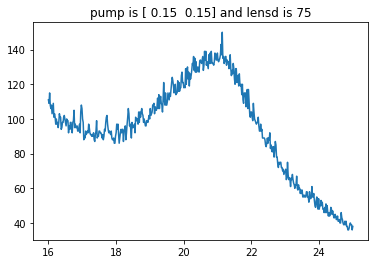

150.0 21.1402805611
[-0.18164782, 0.0049671885, 96.335892]
final coinc are 57
330395
(231723, 2)


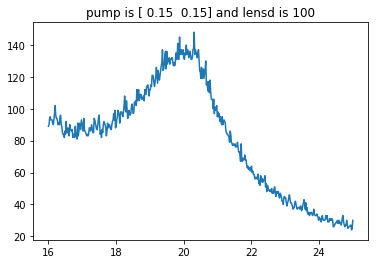

148.0 20.3106212425
[-0.24906403, -0.026367759, 120.26089]
final coinc are 71
332028
(203307, 2)


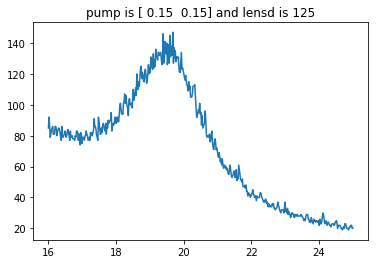

147.0 19.6793587174
[-0.20537353, -0.0056977426, 144.76144]
final coinc are 111
331176
(179797, 2)


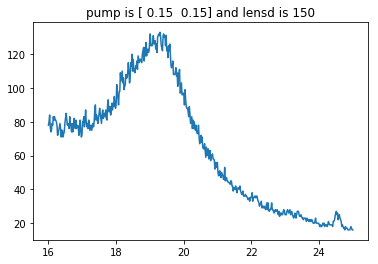

133.0 19.3006012024
[-0.21421759, 0.0044512106, 169.41142]
final coinc are 112
331693
(161319, 2)


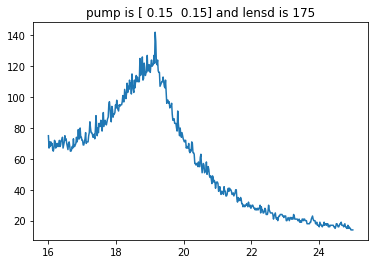

142.0 19.1563126253
[-0.20727347, -0.0011388384, 194.18987]
final coinc are 127
330605
(145235, 2)


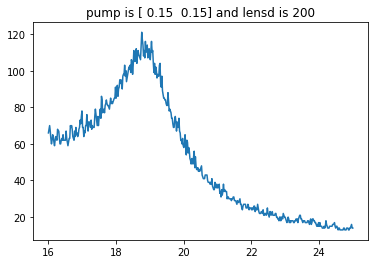

121.0 18.7595190381
[-0.17339043, -0.0019792439, 219.03918]
final coinc are 115
332338
(132306, 2)


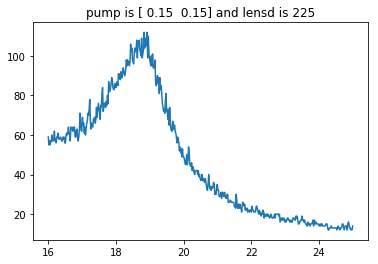

112.0 18.8316633267
[-0.18286495, 0.013434043, 243.90186]
final coinc are 124
331665
(120922, 2)


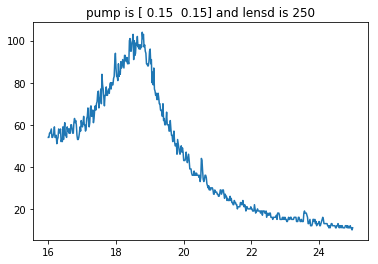

104.0 18.7775551102
[-0.20813867, -0.0012117649, 268.79996]
final coinc are 124
330730
(111474, 2)


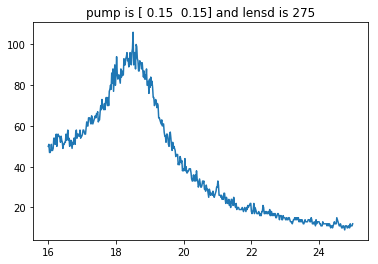

106.0 18.5070140281
[-0.17707385, 0.026216008, 293.73981]
final coinc are 85
331859
(103600, 2)


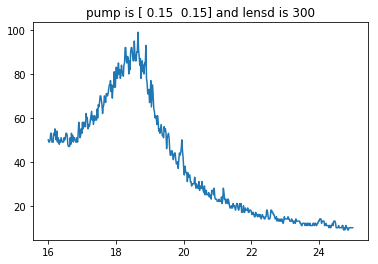

99.0 18.6513026052
[-0.18022923, -0.0064842729, 318.65997]
final coinc are 110
330682
(95928, 2)


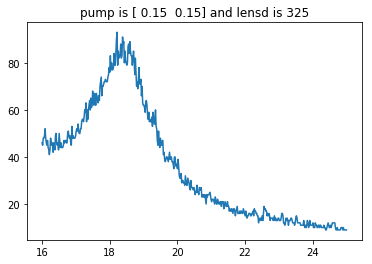

93.0 18.2184368737
[-0.22800459, 0.0043519186, 343.04172]
final coinc are 5
331415
(90576, 2)


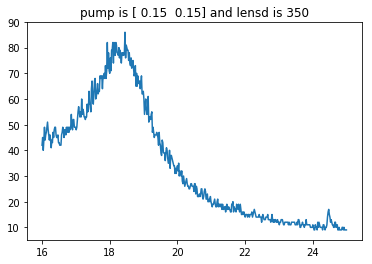

86.0 18.4529058116
[-0.19753574, 0.0071569029, 368.55417]
final coinc are 108
331567
(84786, 2)


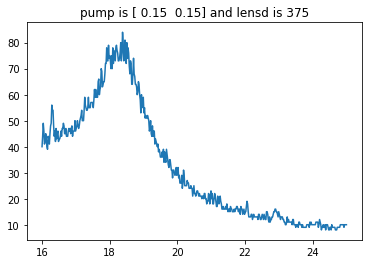

84.0 18.380761523
[-0.18891451, -0.0062302989, 393.51974]
final coinc are 94
[ 0.1  0.1]
331675
(270506, 2)


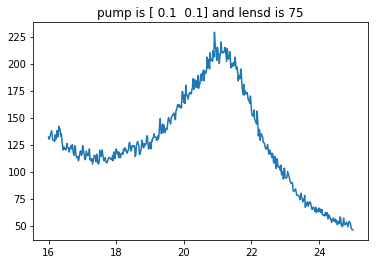

229.0 20.9058116232
[-0.26556322, -0.0043977592, 96.170647]
final coinc are 130
330903
(232277, 2)


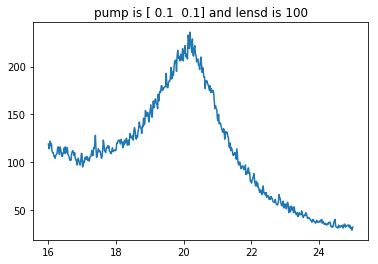

236.0 20.1843687375
[-0.19650094, -0.015159131, 120.30423]
final coinc are 150
331738
(203524, 2)


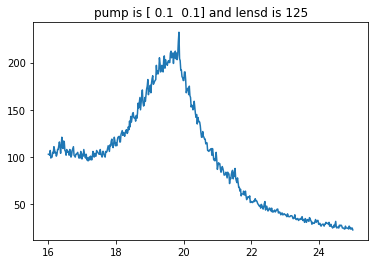

232.0 19.8597194389
[-0.14963779, 0.0055452925, 144.79732]
final coinc are 173
330834
(179824, 2)


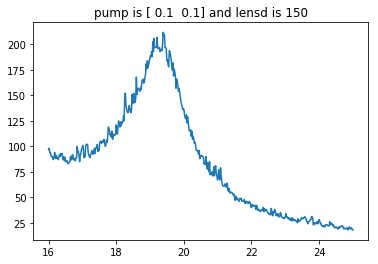

212.0 19.3907815631
[-0.17565307, 0.017691711, 169.45216]
final coinc are 192
330992
(161215, 2)


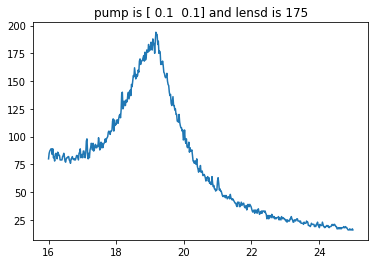

194.0 19.1743486974
[-0.19723441, 0.0050145043, 194.20021]
final coinc are 224
330656
(144996, 2)


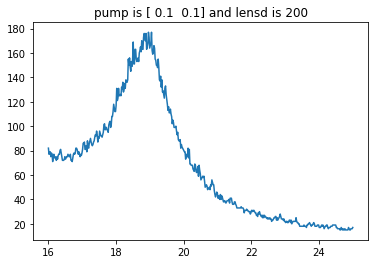

177.0 18.9579158317
[-0.22735119, -0.0047184872, 219.01288]
final coinc are 212
332863
(132876, 2)


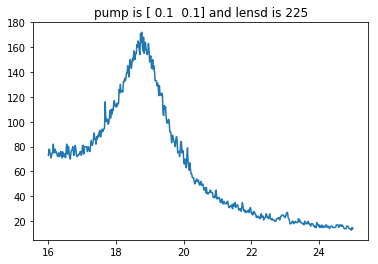

172.0 18.7595190381
[-0.21418454, -0.0033264502, 243.89732]
final coinc are 219
331564
(121703, 2)


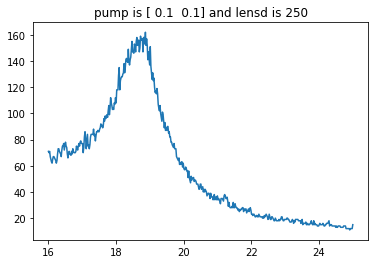

162.0 18.8677354709
[-0.18979354, -0.0010455892, 268.80511]
final coinc are 199
331058
(111687, 2)


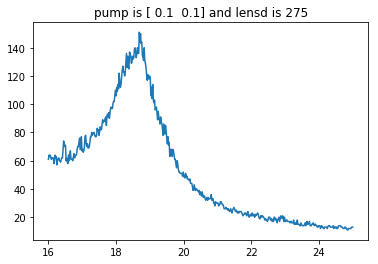

151.0 18.6873747495
[-0.18442385, -0.01022518, 293.72336]
final coinc are 209
331190
(104003, 2)


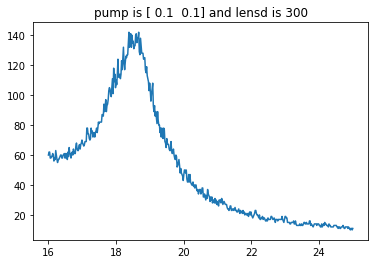

142.0 18.380761523
[-0.19202693, 0.0090793446, 318.65805]
final coinc are 194
332011
(96598, 2)


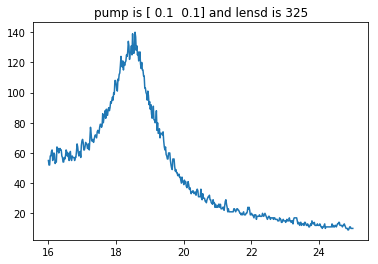

140.0 18.5611222445
[-0.17719272, 0.0076495712, 343.60315]
final coinc are 196
331851
(90347, 2)


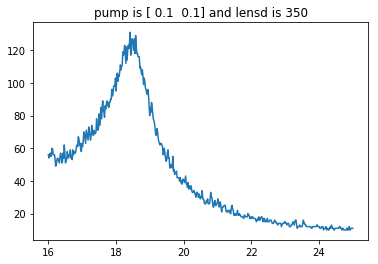

131.0 18.4168336673
[-0.14304645, 0.0025272679, 368.5686]
final coinc are 146
330262
(84485, 2)


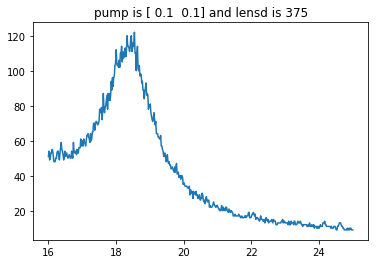

122.0 18.5430861723
[-0.17250928, 0.0060679014, 393.51373]
final coinc are 153
[ 0.05  0.05]
332097
(270969, 2)


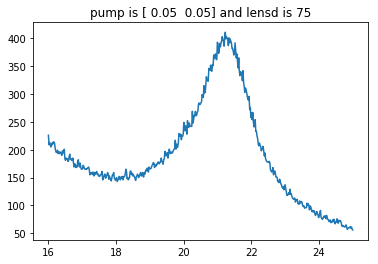

411.0 21.2304609218
[-0.20713711, 0.011034755, 96.287468]
final coinc are 391
331746
(233055, 2)


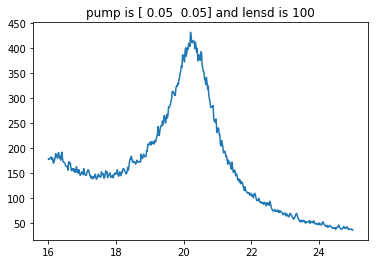

431.0 20.2024048096
[-0.20194609, 0.0024557954, 120.3129]
final coinc are 444
331689
(203275, 2)


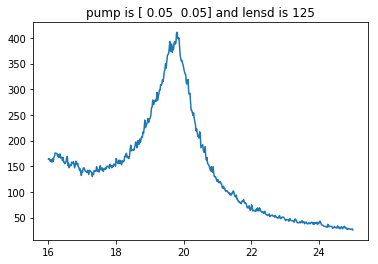

411.0 19.8056112224
[-0.17759696, -0.0066761523, 144.78572]
final coinc are 532
330847
(179684, 2)


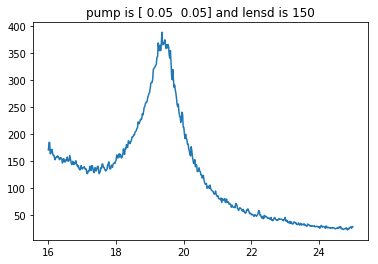

389.0 19.3547094188
[-0.22608632, -0.00087336526, 169.40527]
final coinc are 534
333020
(162058, 2)


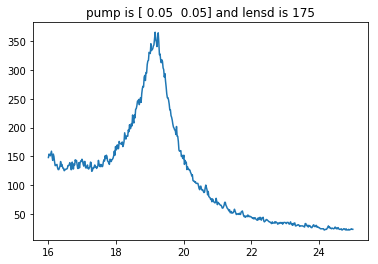

366.0 19.1563126253
[-0.21548542, 0.00036995308, 194.18571]
final coinc are 531
332489
(145704, 2)


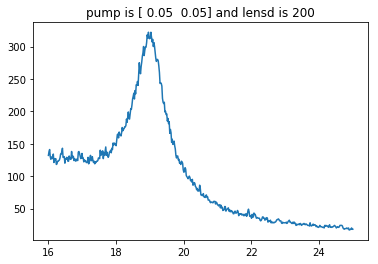

322.0 18.9579158317
[-0.24817228, 0.002936722, 219.00311]
final coinc are 496
331169
(132124, 2)


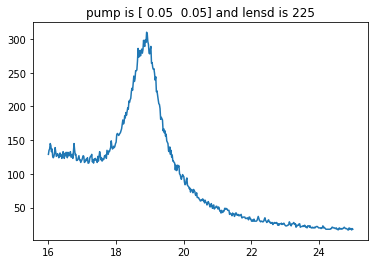

310.0 18.9038076152
[-0.23450378, 0.0021994994, 243.88565]
final coinc are 459
331100
(121592, 2)


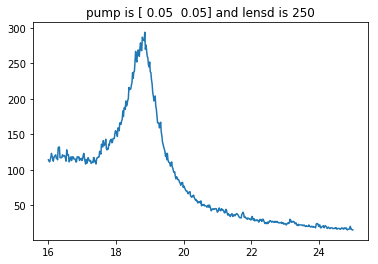

294.0 18.8496993988
[-0.15920739, 0.0019243871, 268.82724]
final coinc are 435
331932
(112383, 2)


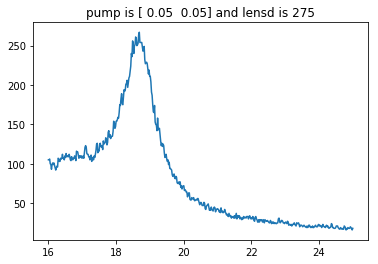

267.0 18.6873747495
[-0.16945529, 0.0022538968, 293.73361]
final coinc are 443
332432
(104405, 2)


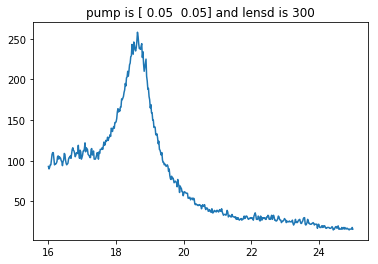

258.0 18.6332665331
[-0.22121273, -0.0019539446, 318.63916]
final coinc are 442
332097
(96800, 2)


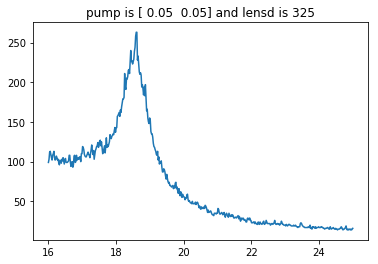

263.0 18.5971943888
[-0.19422989, 9.6573291e-05, 343.60022]
final coinc are 392
332324
(90721, 2)


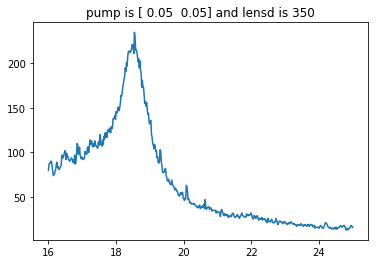

235.0 18.5430861723
[-0.1805933, 0.0038926674, 368.55923]
final coinc are 373
331739
(84623, 2)


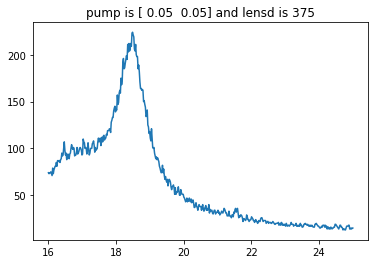

224.0 18.4889779559
[-0.16728339, -0.00072635734, 393.52414]
final coinc are 391
[ 0.03333  0.03333]
339759
(278550, 2)


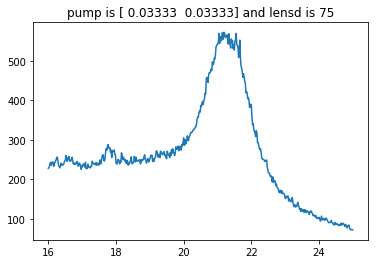

572.0 21.1943887776
[-0.2915158, 0.0017435865, 96.136116]
final coinc are 767
341089
(242089, 2)


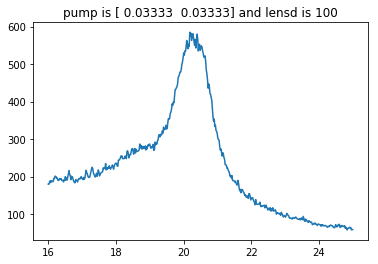

585.0 20.1843687375
[-0.27211383, 0.00075399375, 120.21727]
final coinc are 874
340013
(211661, 2)


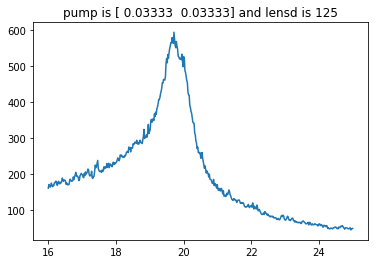

595.0 19.7154308617
[-0.24725942, 0.001261897, 144.71921]
final coinc are 892
339644
(187467, 2)


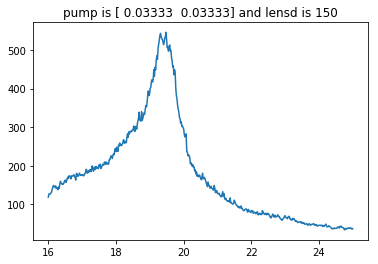

546.0 19.4809619238
[-0.2428862, 0.0005978453, 169.39699]
final coinc are 900
339424
(168374, 2)


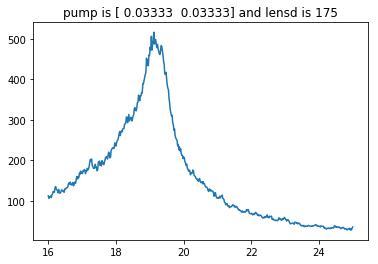

516.0 19.120240481
[-0.25196725, -0.002114747, 194.16252]
final coinc are 838
339835
(152323, 2)


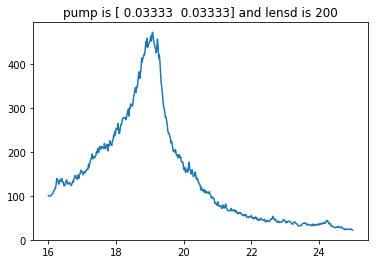

473.0 19.0841683367
[-0.23248768, 0.00075306953, 219.01125]
final coinc are 766
339093
(138854, 2)


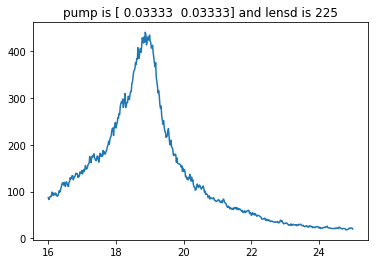

441.0 18.8677354709
[-0.22125486, -0.00016052718, 243.89339]
final coinc are 724
338725
(126394, 2)


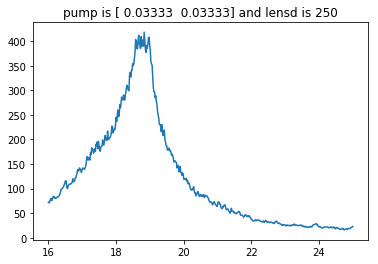

418.0 18.8316633267
[-0.21763729, -0.0008367179, 268.79288]
final coinc are 714
339635
(117088, 2)


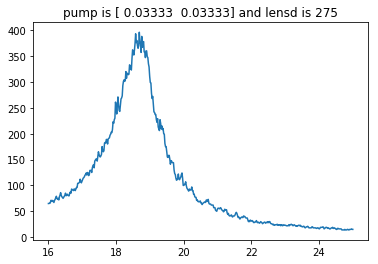

396.0 18.6873747495
[-0.24326622, -0.00078575988, 293.70453]
final coinc are 663
338720
(108605, 2)


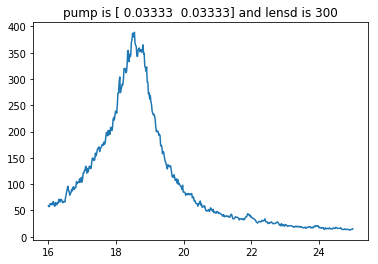

389.0 18.5430861723
[-0.23727606, -0.0010158791, 318.64188]
final coinc are 622
339421
(100606, 2)


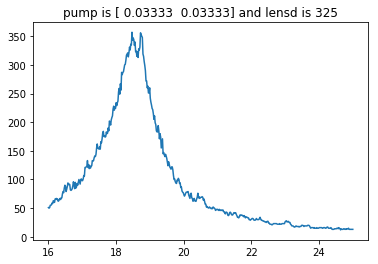

357.0 18.4709418838
[-0.24362691, -0.0018921937, 343.5835]
final coinc are 593
339613
(94291, 2)


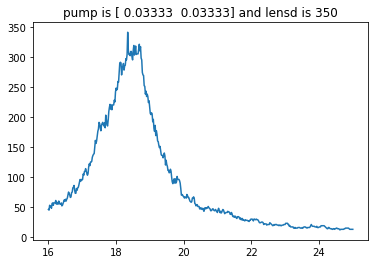

341.0 18.3446893788
[-0.2100174, -0.0011916257, 368.54971]
final coinc are 535
339298
(88238, 2)


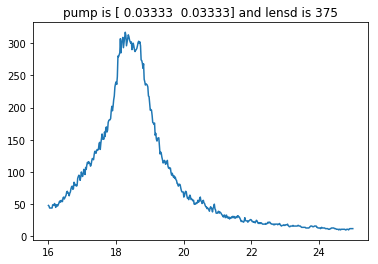

317.0 18.2725450902
[-0.23562528, 0.00069979759, 393.49823]
final coinc are 546
[ 0.025  0.025]
339279
(277499, 2)


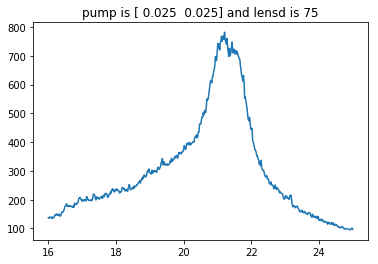

782.0 21.2124248497
[-0.24789013, -0.00075237144, 96.226578]
final coinc are 1064
338180
(238600, 2)


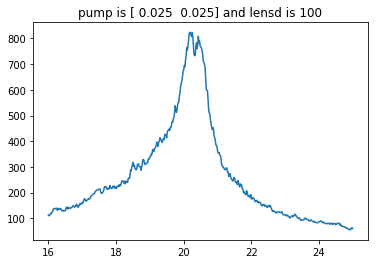

824.0 20.1843687375
[-0.24050683, -0.0047723078, 120.25957]
final coinc are 1252
338211
(207968, 2)


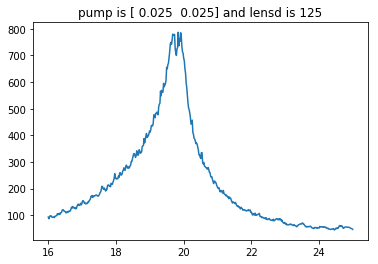

787.0 19.8416833667
[-0.23734908, 0.0012641887, 144.72827]
final coinc are 1326
338673
(183952, 2)


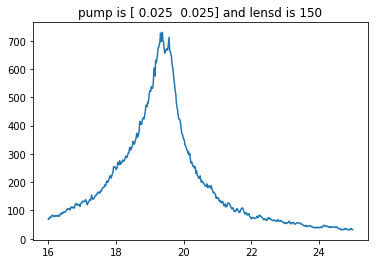

730.0 19.372745491
[-0.22967011, 0.000851797, 169.41148]
final coinc are 1204
338752
(162471, 2)


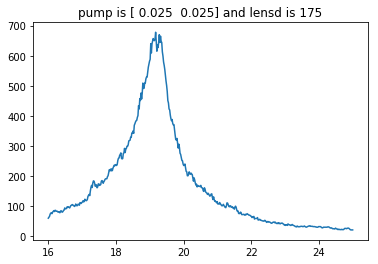

678.0 19.1743486974
[-0.2298294, 0.0020057003, 194.18326]
final coinc are 1195
339226
(145960, 2)


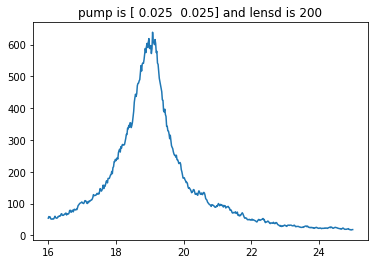

639.0 19.0841683367
[-0.22000727, -0.0012826563, 219.01933]
final coinc are 1069
339227
(132005, 2)


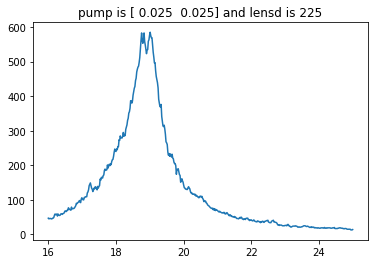

585.0 19.0120240481
[-0.14357398, -0.00099620491, 243.9355]
final coinc are 1073
339102
(119654, 2)


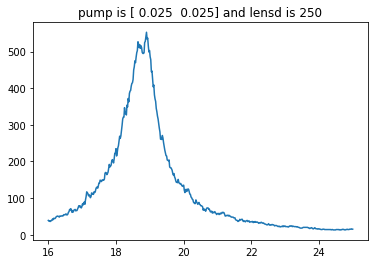

553.0 18.9038076152
[-0.19117366, -0.00025934313, 268.80914]
final coinc are 859
339108
(110329, 2)


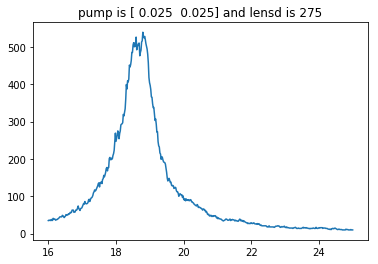

539.0 18.7955911824
[-0.1515189, 0.0014986281, 293.73834]
final coinc are 856
338147
(100976, 2)


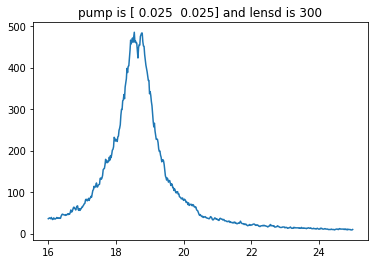

485.0 18.5430861723
[-0.21569802, -0.00014329139, 318.65259]
final coinc are 796
338758
(93249, 2)


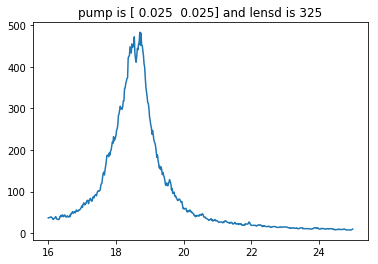

483.0 18.7054108216
[-0.18259102, 0.00030678391, 343.60925]
final coinc are 710
338103
(86723, 2)


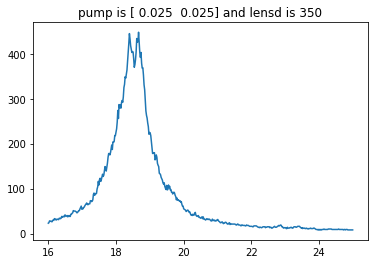

448.0 18.6693386774
[-0.1844041, -0.0020092044, 368.55508]
final coinc are 647
339575
(81625, 2)


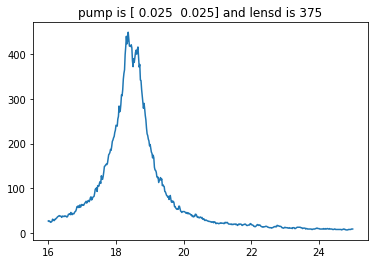

449.0 18.3627254509
[-0.15268856, -0.00020033112, 393.52701]
final coinc are 665
doing iteration 1
[ 0.15  0.15]
330695
(269830, 2)


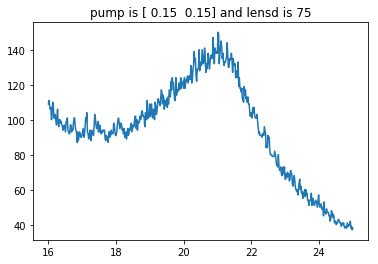

150.0 21.0140280561
[-0.26170126, -0.0090176184, 96.142395]
final coinc are 55
331532
(232429, 2)


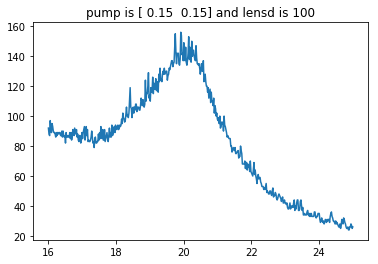

156.0 19.9138276553
[-0.22790641, -0.017330879, 119.83619]
final coinc are 10
330755
(202546, 2)


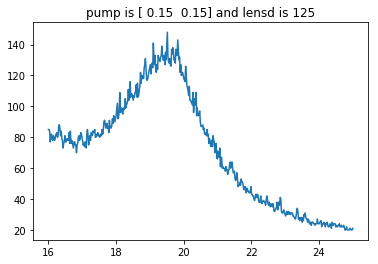

148.0 19.5170340681
[-0.21141654, -0.021810144, 144.7502]
final coinc are 88
332321
(180490, 2)


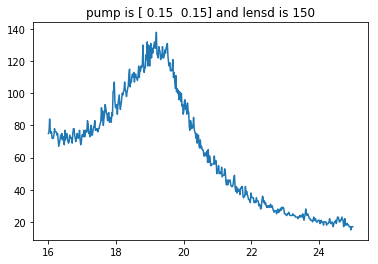

138.0 19.1923847695
[-0.24920139, 0.023757454, 169.39447]
final coinc are 88
332221
(161463, 2)


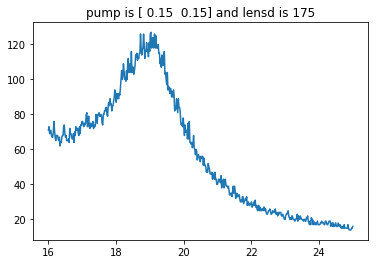

127.0 19.0300601202
[-0.19340461, 0.0041973293, 194.19736]
final coinc are 132
331032
(144849, 2)


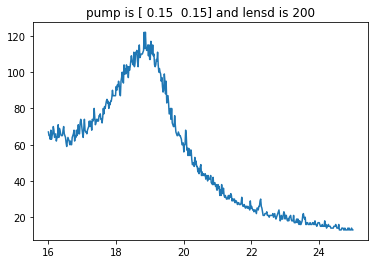

122.0 18.8316633267
[-0.19960439, 0.0081890244, 219.03432]
final coinc are 124
330717
(131588, 2)


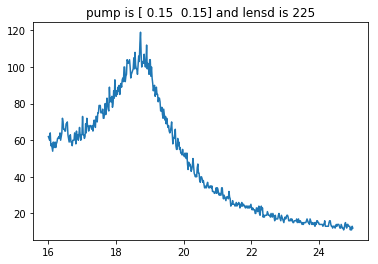

119.0 18.7234468938
[-0.20118646, 0.00087885949, 243.90034]
final coinc are 138
329745
(119656, 2)


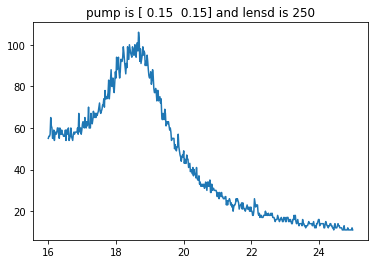

106.0 18.6693386774
[-0.22633998, 0.014663121, 268.78232]
final coinc are 103
332098
(111822, 2)


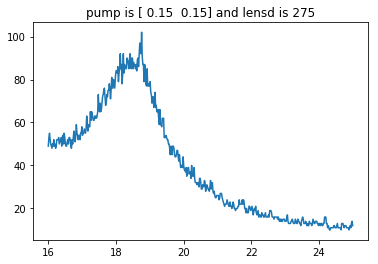

102.0 18.7595190381
[-0.16905433, 0.0083126333, 293.71793]
final coinc are 108
331189
(103407, 2)


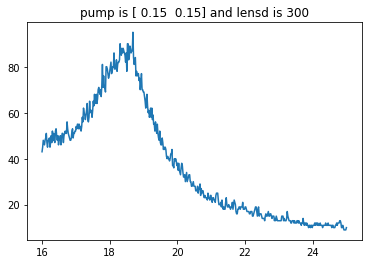

95.0 18.6873747495
[-0.19288249, 0.0041332757, 318.65317]
final coinc are 126
331977
(96472, 2)


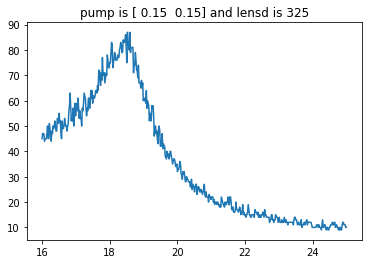

87.0 18.5250501002
[-0.15973088, -0.0046177455, 343.61765]
final coinc are 94
330863
(89819, 2)


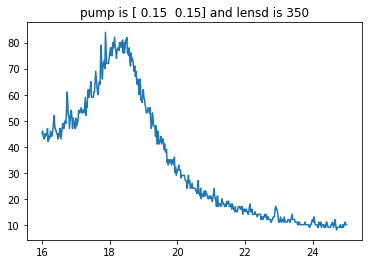

84.0 17.875751503
[-0.19499393, 0.02368889, 367.80099]
final coinc are 2
332660
(85112, 2)


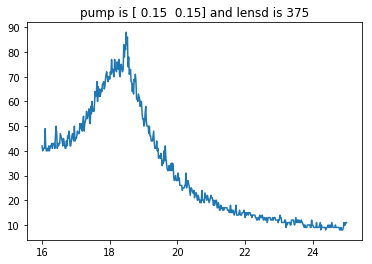

88.0 18.4889779559
[-0.21518598, -0.011563458, 393.51007]
final coinc are 102
[ 0.1  0.1]
331724
(270541, 2)


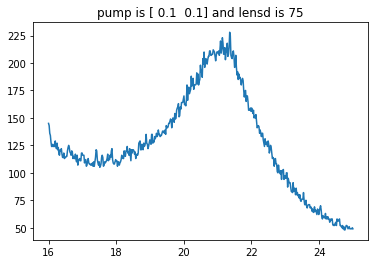

228.0 21.3567134269
[-0.20140703, 0.0052296561, 96.283134]
final coinc are 145
331041
(232694, 2)


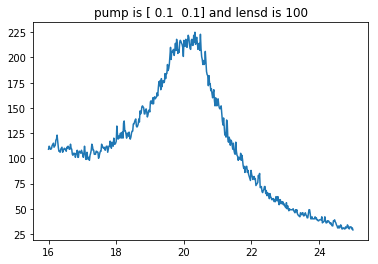

225.0 20.3286573146
[-0.19262142, 0.013197544, 120.31897]
final coinc are 180
330579
(202131, 2)


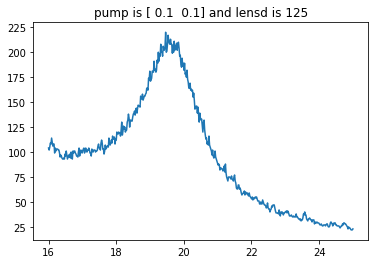

220.0 19.4629258517
[-0.23225096, -0.0095324321, 144.73785]
final coinc are 183
331440
(179501, 2)


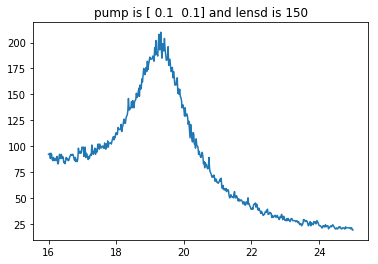

210.0 19.3186372745
[-0.21772528, 0.0019799033, 169.40135]
final coinc are 206
331829
(161049, 2)


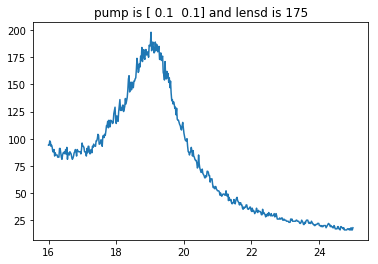

198.0 19.0300601202
[-0.22194138, -0.0010633824, 194.17146]
final coinc are 200
331423
(145396, 2)


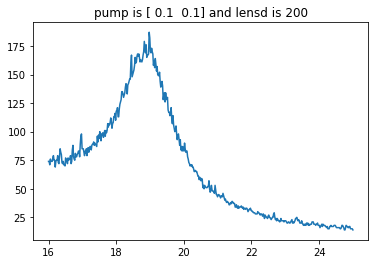

187.0 18.9759519038
[-0.19400312, -0.0096390126, 219.03043]
final coinc are 197
331247
(132490, 2)


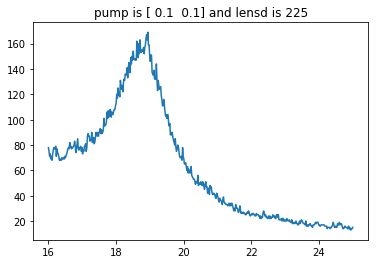

169.0 18.9398797595
[-0.20474163, -0.00062520971, 243.89803]
final coinc are 211
330863
(120983, 2)


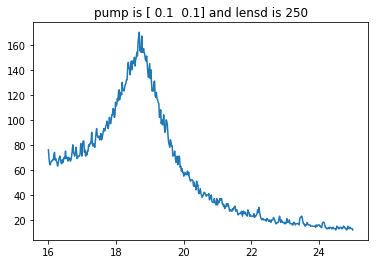

170.0 18.6873747495
[-0.19012728, -0.0018855542, 268.8017]
final coinc are 209
330648
(111589, 2)


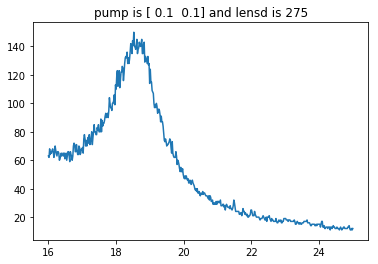

150.0 18.5250501002
[-0.24459064, -0.0044505391, 293.711]
final coinc are 143
331415
(103333, 2)


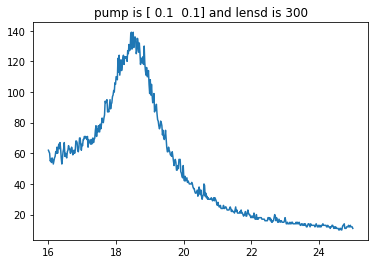

139.0 18.4529058116
[-0.17359167, -0.00058756245, 318.66641]
final coinc are 186
331758
(96367, 2)


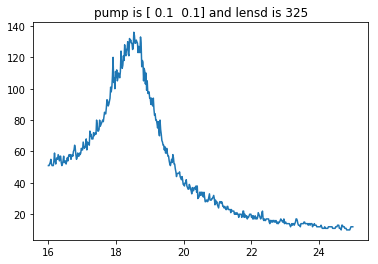

136.0 18.5250501002
[-0.19225188, 0.0021527875, 343.60358]
final coinc are 193
331373
(90515, 2)


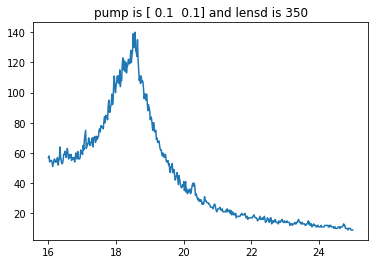

140.0 18.5611222445
[-0.19078261, -0.0018837415, 368.5481]
final coinc are 200
331829
(84270, 2)


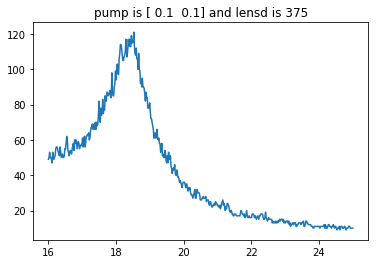

121.0 18.5250501002
[-0.15849005, -0.0075009819, 393.52478]
final coinc are 173
[ 0.05  0.05]
333377
(271981, 2)


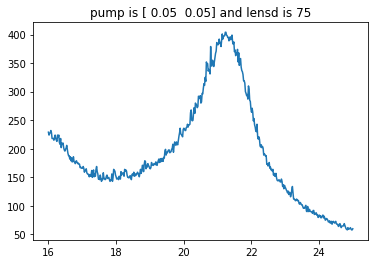

404.0 21.2304609218
[-0.23404047, -0.00097192457, 96.247124]
final coinc are 419
331276
(232872, 2)


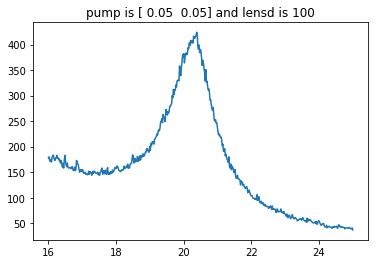

424.0 20.3827655311
[-0.15955094, 0.0029776876, 120.35055]
final coinc are 437
331368
(204038, 2)


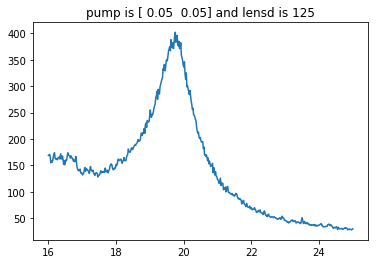

402.0 19.751503006
[-0.19101025, -0.0023411706, 144.78337]
final coinc are 543
331883
(180211, 2)


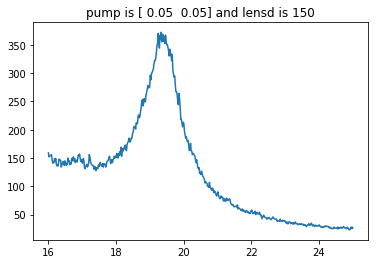

372.0 19.3366733467
[-0.1820983, -0.00021635811, 169.45279]
final coinc are 516
332100
(161091, 2)


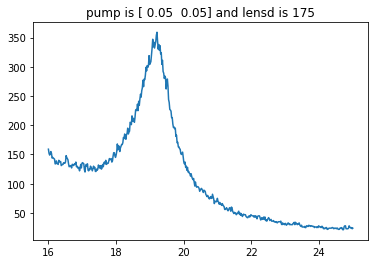

359.0 19.2104208417
[-0.14957161, 0.00068934815, 194.23538]
final coinc are 516
332094
(146049, 2)


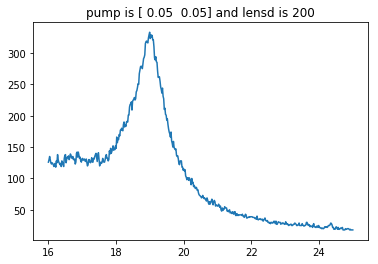

333.0 18.993987976
[-0.18781298, -0.00014956207, 219.03931]
final coinc are 490
331405
(131954, 2)


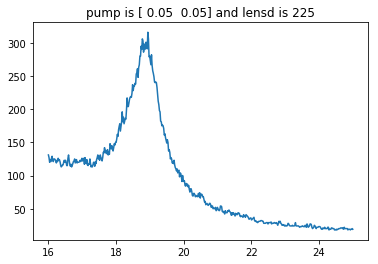

316.0 18.9398797595
[-0.15874614, 0.0018474652, 243.92087]
final coinc are 489
332243
(121217, 2)


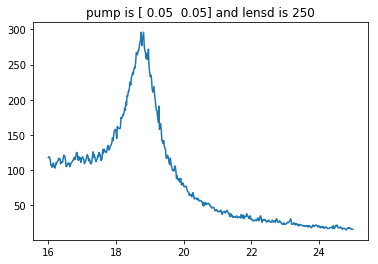

296.0 18.7414829659
[-0.1742055, -0.0045413822, 268.8158]
final coinc are 441
332489
(112568, 2)


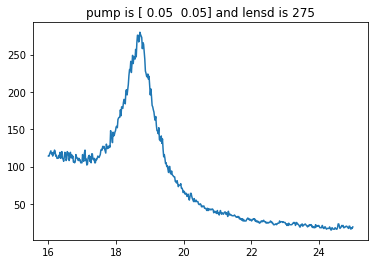

280.0 18.7054108216
[-0.17259821, -0.0038196146, 293.73325]
final coinc are 468
331739
(103710, 2)


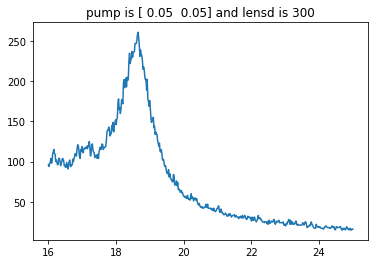

261.0 18.6513026052
[-0.1929085, 0.003777365, 318.65082]
final coinc are 422
331338
(96708, 2)


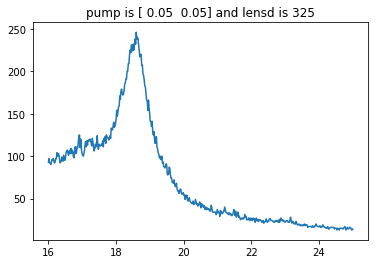

246.0 18.5971943888
[-0.1966628, 0.0011915441, 343.59903]
final coinc are 413
331886
(90428, 2)


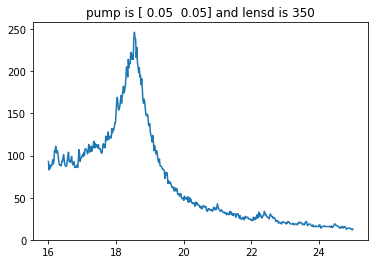

246.0 18.5430861723
[-0.17182308, 0.0011159569, 368.56055]
final coinc are 397
331972
(84610, 2)


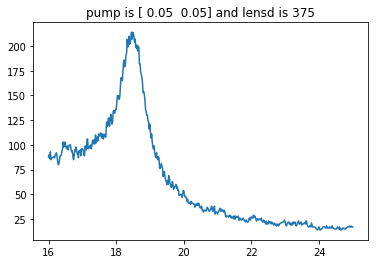

214.0 18.4529058116
[-0.18665303, 0.0049941009, 393.51608]
final coinc are 340
[ 0.03333  0.03333]
339700
(278359, 2)


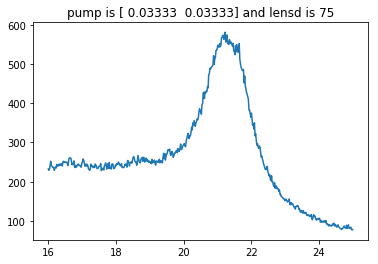

581.0 21.2304609218
[-0.2061252, -0.0050560008, 96.302216]
final coinc are 636
339491
(240694, 2)


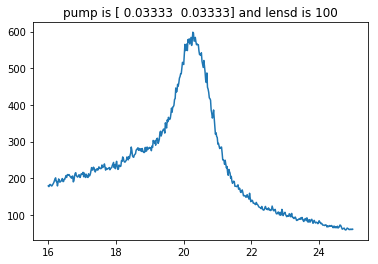

598.0 20.2745490982
[-0.1713272, 0.0019986818, 120.34135]
final coinc are 771
339846
(211313, 2)


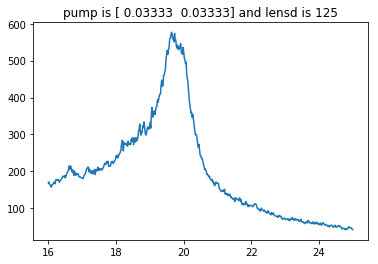

577.0 19.6432865731
[-0.26173046, -0.0014524693, 144.70465]
final coinc are 886
340799
(188592, 2)


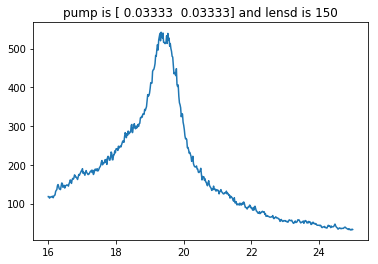

542.0 19.3366733467
[-0.19302811, 0.00061676424, 169.43079]
final coinc are 841
339801
(167904, 2)


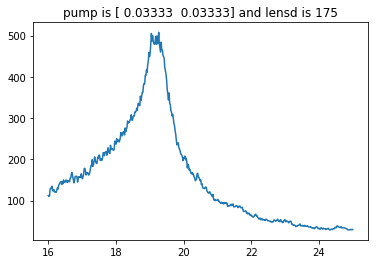

508.0 19.2645290581
[-0.19213171, -0.0019108616, 194.20436]
final coinc are 793
339857
(152700, 2)


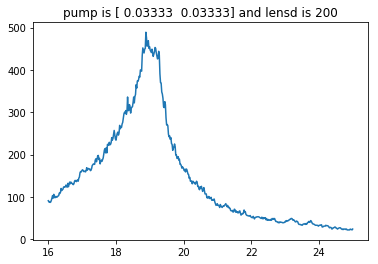

489.0 18.8857715431
[-0.25564075, 0.0017758912, 218.99971]
final coinc are 820
339494
(139119, 2)


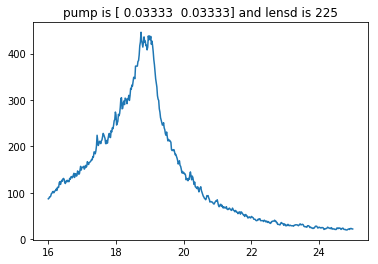

446.0 18.7414829659
[-0.2599034, -0.0035653478, 243.87375]
final coinc are 683
339767
(127342, 2)


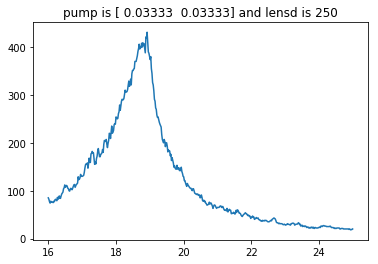

431.0 18.9218436874
[-0.18785407, 0.0010031934, 268.81277]
final coinc are 698
339851
(117275, 2)


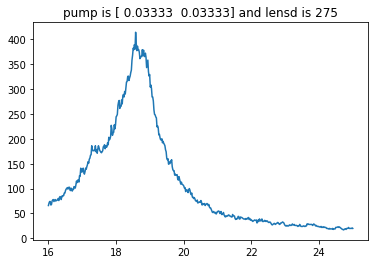

414.0 18.5791583166
[-0.22215086, -0.0012647195, 293.71741]
final coinc are 666
340442
(108884, 2)


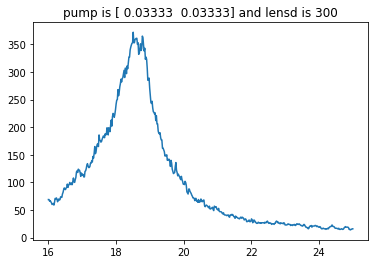

372.0 18.5070140281
[-0.24853201, 0.0014823787, 318.63678]
final coinc are 607
340083
(100997, 2)


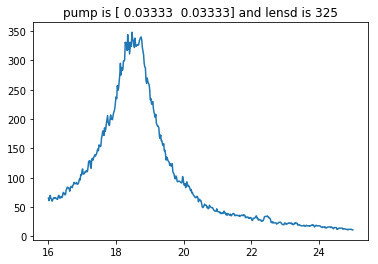

348.0 18.4709418838
[-0.18089463, 0.0020891742, 343.60455]
final coinc are 584
339012
(94523, 2)


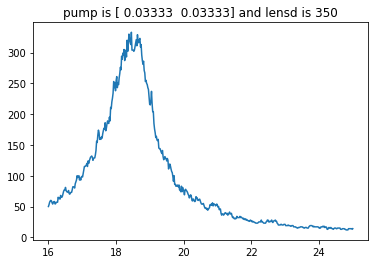

333.0 18.4529058116
[-0.19034927, 0.0010740563, 368.55344]
final coinc are 577
339947
(88567, 2)


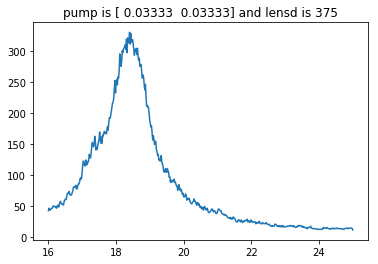

330.0 18.3987975952
[-0.18324503, 6.2814644e-05, 393.51666]
final coinc are 533
[ 0.025  0.025]
337634
(276331, 2)


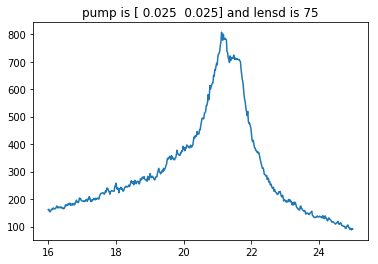

807.0 21.122244489
[-0.2436671, 0.00023349746, 96.232681]
final coinc are 1103
338255
(238352, 2)


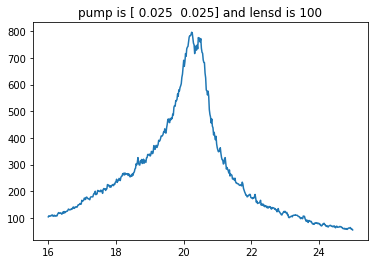

796.0 20.2384769539
[-0.23934443, 0.0041164532, 120.259]
final coinc are 1205
338807
(208227, 2)


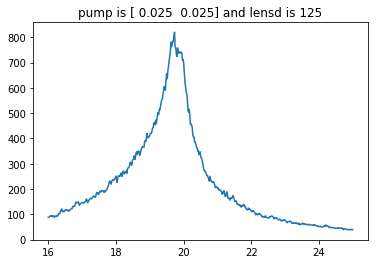

820.0 19.7334669339
[-0.14520431, -5.7069294e-05, 144.81596]
final coinc are 1133
338110
(183329, 2)


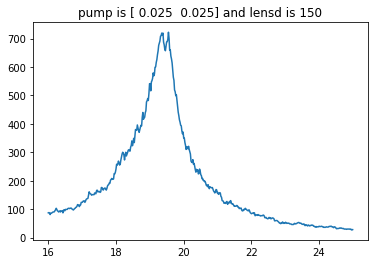

722.0 19.5531062124
[-0.14620483, -0.00095534348, 169.47011]
final coinc are 1201
339262
(163334, 2)


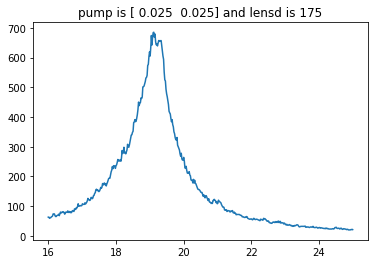

685.0 19.120240481
[-0.22635385, -0.0011673999, 194.18085]
final coinc are 1139
339145
(145897, 2)


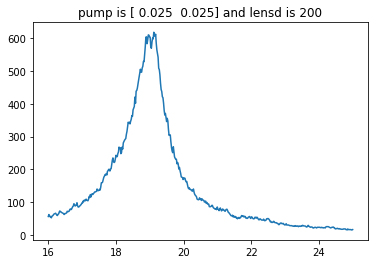

619.0 19.120240481
[-0.22599405, -0.0020438398, 219.02269]
final coinc are 1091
338575
(131334, 2)


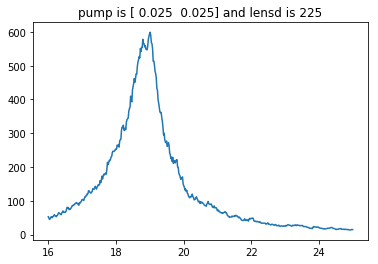

599.0 19.0120240481
[-0.14704415, 0.0012790404, 243.93214]
final coinc are 1001
338930
(119323, 2)


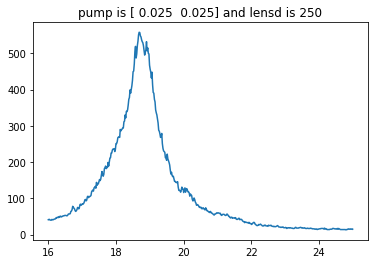

558.0 18.6873747495
[-0.22228996, -0.00039686321, 268.79282]
final coinc are 959
337840
(109289, 2)


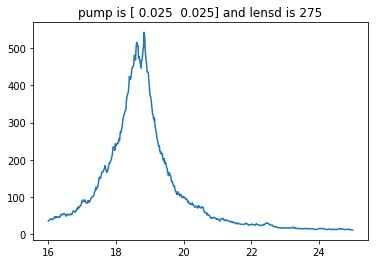

543.0 18.8316633267
[-0.1678099, 0.00044328684, 293.73657]
final coinc are 771
338261
(100813, 2)


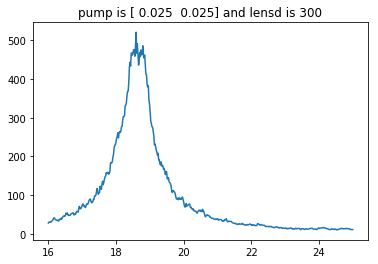

521.0 18.5971943888
[-0.19318241, -0.0012327376, 318.66]
final coinc are 788
338777
(93426, 2)


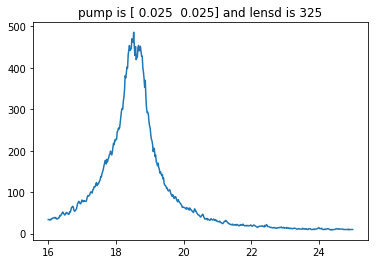

486.0 18.5250501002
[-0.16519271, -0.00096235983, 343.61218]
final coinc are 699
338805
(87279, 2)


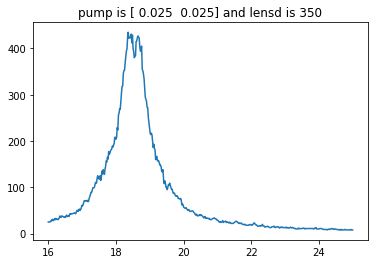

435.0 18.3627254509
[-0.19209027, -0.00041847906, 368.55112]
final coinc are 737
337760
(80830, 2)


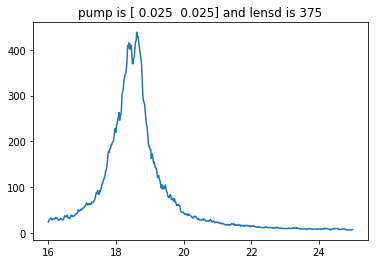

438.0 18.6152304609
[-0.14970979, -5.6072928e-05, 393.52216]
final coinc are 641
doing iteration 2
[ 0.15  0.15]
331946
(270302, 2)


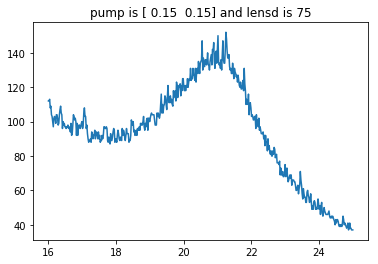

152.0 21.248496994
[-0.21645772, -0.046773627, 96.263641]
final coinc are 50
331595
(232387, 2)


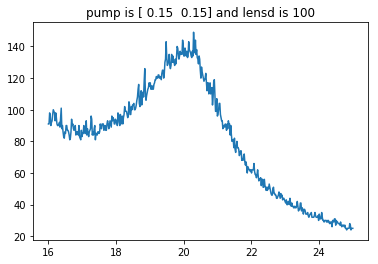

149.0 20.2925851703
[-0.23302883, -0.0051628351, 120.25584]
final coinc are 91
331040
(203646, 2)


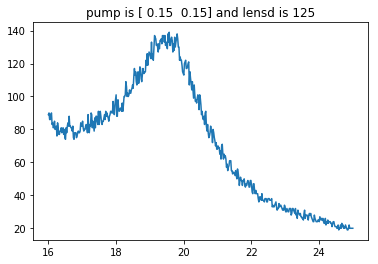

139.0 19.5711422846
[-0.2049776, -0.01254014, 144.74455]
final coinc are 102
331444
(180075, 2)


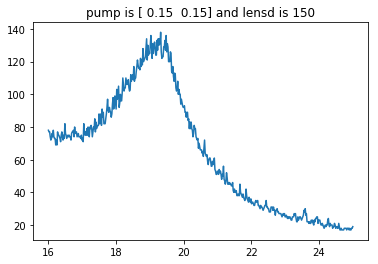

138.0 19.3186372745
[-0.18795455, 0.0044143219, 169.4384]
final coinc are 113
330590
(160529, 2)


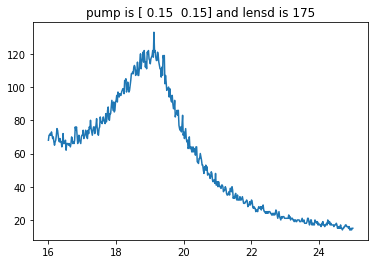

133.0 19.120240481
[-0.18493623, 0.0035845721, 194.20695]
final coinc are 128
330911
(144944, 2)


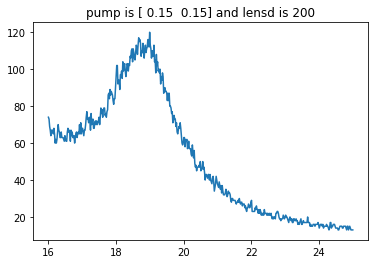

120.0 18.993987976
[-0.22779126, -0.0024254317, 219.01498]
final coinc are 115
330603
(131555, 2)


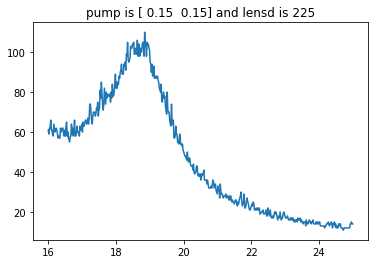

110.0 18.8496993988
[-0.1616113, 0.023282032, 243.90604]
final coinc are 112
331118
(121309, 2)


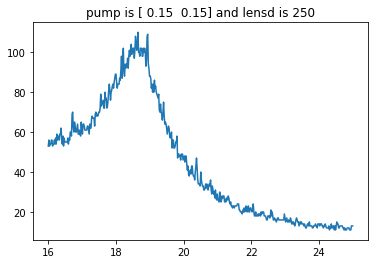

110.0 18.6513026052
[-0.21390176, 0.0027618259, 268.79559]
final coinc are 111
330272
(111173, 2)


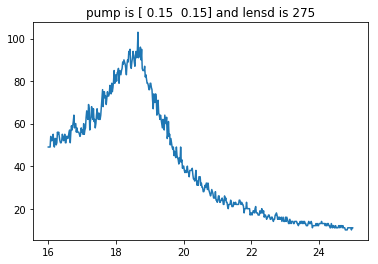

103.0 18.6513026052
[-0.20231555, 0.0017747126, 293.71841]
final coinc are 105
331458
(103618, 2)


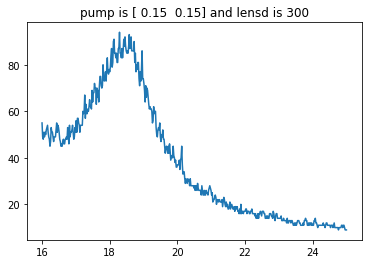

94.0 18.2905811623
[-0.25757679, -0.0024720847, 318.60883]
final coinc are 41
330952
(96534, 2)


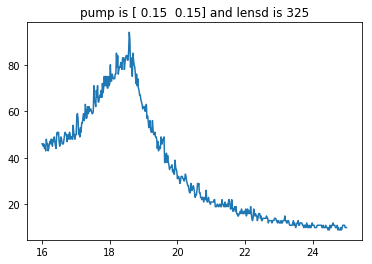

94.0 18.5791583166
[-0.19013108, -0.0115586, 343.58868]
final coinc are 86
331352
(90262, 2)


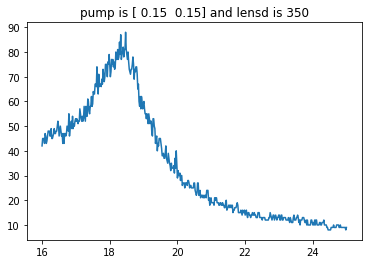

88.0 18.4709418838
[-0.1907668, 0.011877482, 368.54941]
final coinc are 113
331335
(84881, 2)


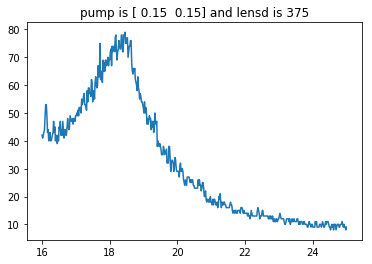

79.0 18.4529058116
[-0.21355134, -0.0024970309, 393.50717]
final coinc are 82
[ 0.1  0.1]
331605
(270743, 2)


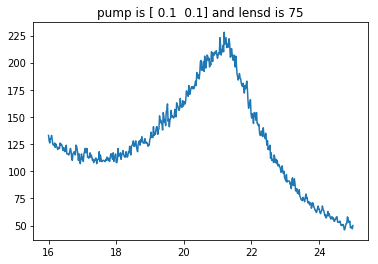

228.0 21.1943887776
[-0.23364174, 0.0043898001, 96.210617]
final coinc are 123
331365
(232856, 2)


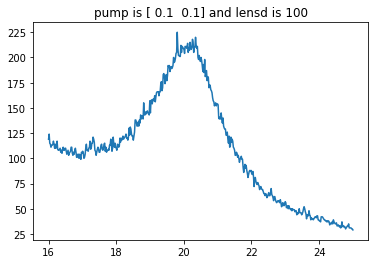

225.0 19.8056112224
[-0.25805247, -0.0027769525, 119.98513]
final coinc are 16
330770
(202893, 2)


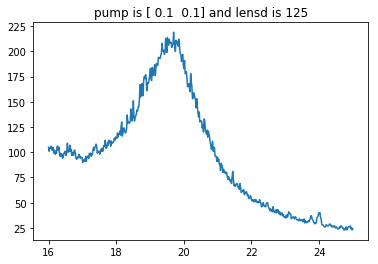

219.0 19.6973947896
[-0.21583928, 0.0042712712, 144.73343]
final coinc are 203
331067
(180278, 2)


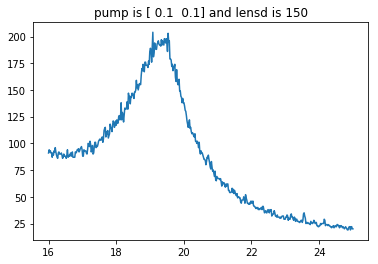

204.0 19.0841683367
[-0.23113826, 0.00013731045, 169.39525]
final coinc are 206
330991
(160707, 2)


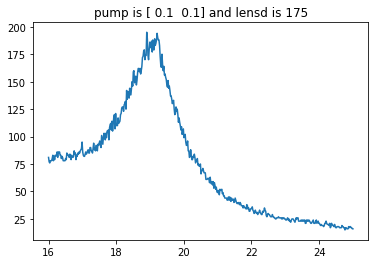

195.0 18.9038076152
[-0.22866935, 0.0016445359, 194.1778]
final coinc are 220
331766
(145647, 2)


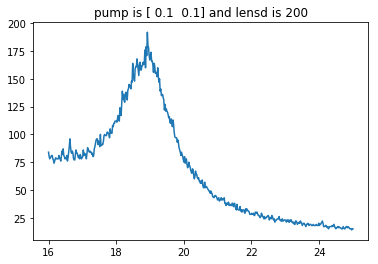

192.0 18.9218436874
[-0.17984933, -0.00040362592, 219.05052]
final coinc are 226
331256
(132121, 2)


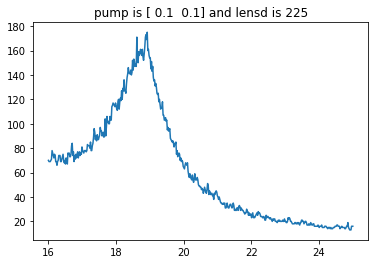

175.0 18.9218436874
[-0.1848561, 0.0010331927, 243.91441]
final coinc are 197
331463
(120973, 2)


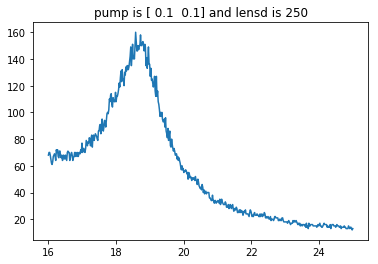

160.0 18.5791583166
[-0.2106818, -0.0018021963, 268.79858]
final coinc are 181
331417
(111825, 2)


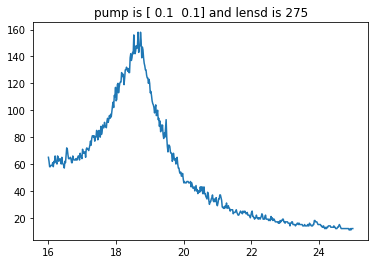

158.0 18.6513026052
[-0.18424608, 0.0069839368, 293.72433]
final coinc are 194
331460
(103448, 2)


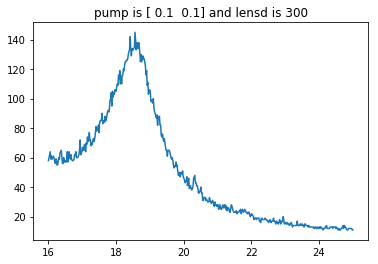

145.0 18.5611222445
[-0.17675065, -0.0048005851, 318.66269]
final coinc are 198
331074
(95816, 2)


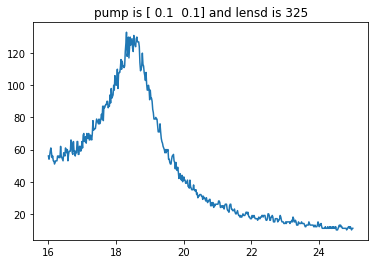

133.0 18.3086172345
[-0.2153312, -0.0044527259, 343.58923]
final coinc are 183
331027
(90183, 2)


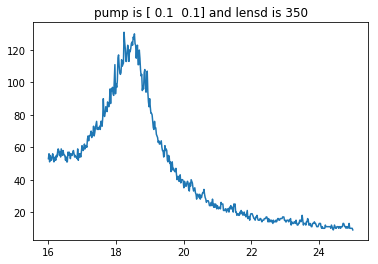

131.0 18.2364729459
[-0.22370405, -0.00374928, 368.53775]
final coinc are 170
330730
(84573, 2)


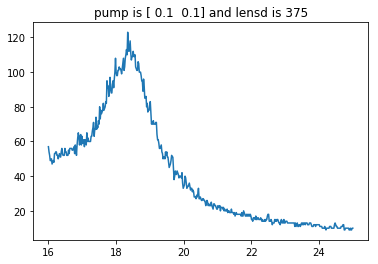

123.0 18.3446893788
[-0.19179901, 0.01322238, 393.51028]
final coinc are 152
[ 0.05  0.05]
331866
(270732, 2)


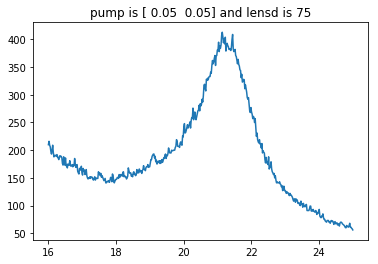

413.0 21.1402805611
[-0.24777205, 0.00088666182, 96.223732]
final coinc are 395
332657
(233849, 2)


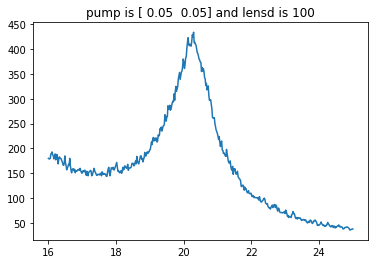

434.0 20.2925851703
[-0.24341145, 0.0013553598, 120.25847]
final coinc are 499
331845
(203860, 2)


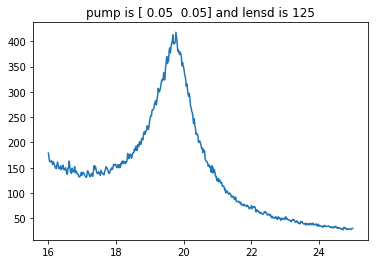

418.0 19.7695390782
[-0.19924714, -0.001948709, 144.76466]
final coinc are 519
332553
(180772, 2)


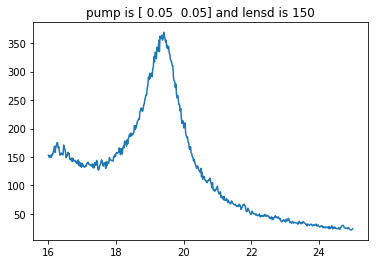

369.0 19.4088176353
[-0.24704699, -0.0040147733, 169.39163]
final coinc are 468
333080
(162032, 2)


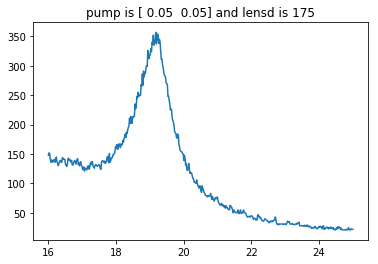

357.0 19.1743486974
[-0.21042709, 0.004787568, 194.1945]
final coinc are 584
331868
(145830, 2)


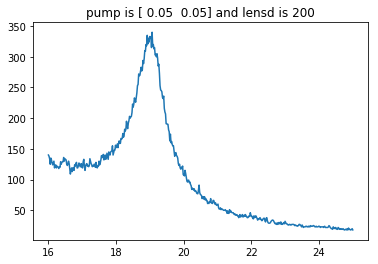

340.0 19.0661322645
[-0.21398205, 0.002349827, 219.01823]
final coinc are 508
332245
(132716, 2)


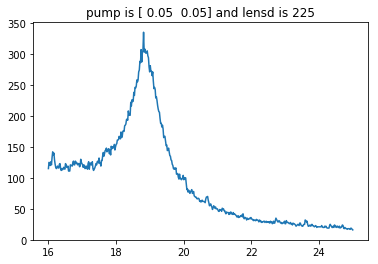

335.0 18.8136272545
[-0.21920352, 0.006948574, 243.88713]
final coinc are 462
331836
(121638, 2)


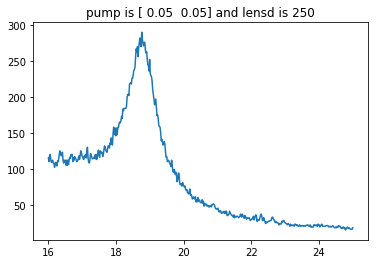

290.0 18.7595190381
[-0.19322453, 0.0015983424, 268.80173]
final coinc are 463
332975
(112567, 2)


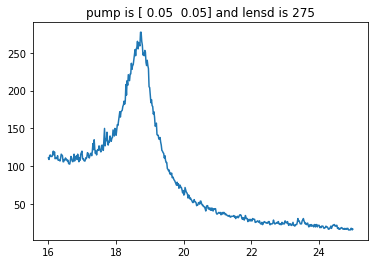

277.0 18.7234468938
[-0.23279542, -0.0053151846, 293.71072]
final coinc are 422
331949
(103858, 2)


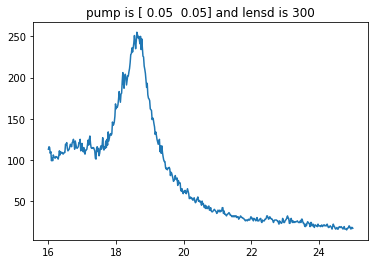

255.0 18.6152304609
[-0.17220266, 0.0071013598, 318.66281]
final coinc are 442
332480
(96790, 2)


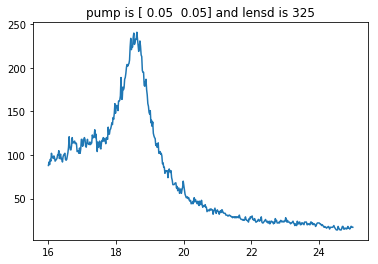

241.0 18.6152304609
[-0.15726618, 0.00023640864, 343.60907]
final coinc are 398
331139
(90138, 2)


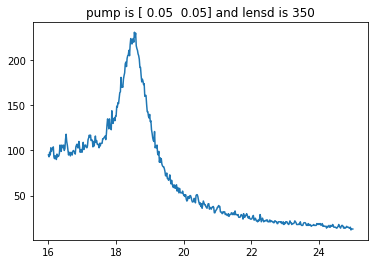

231.0 18.5430861723
[-0.18436152, -0.0033221324, 368.56277]
final coinc are 348
332182
(85223, 2)


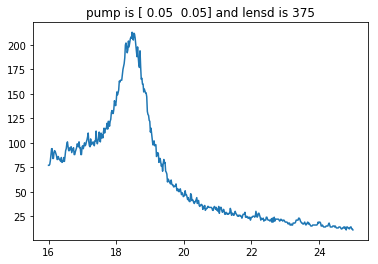

213.0 18.4709418838
[-0.16880722, -0.00077723688, 393.52359]
final coinc are 395
[ 0.03333  0.03333]
339684
(278671, 2)


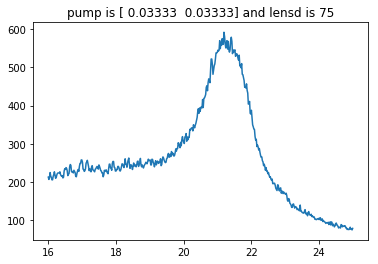

592.0 21.1943887776
[-0.27134615, -0.0010814371, 96.180008]
final coinc are 759
339479
(240696, 2)


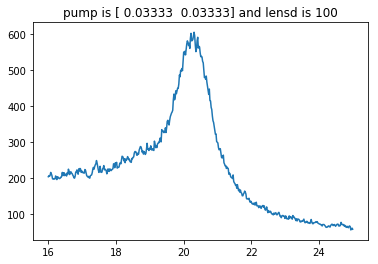

605.0 20.3106212425
[-0.2031313, 0.00019253578, 120.30274]
final coinc are 784
339788
(211572, 2)


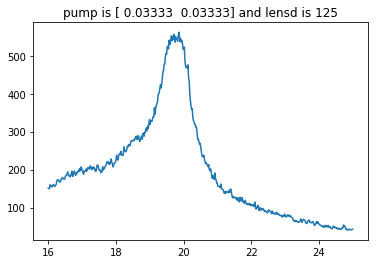

562.0 19.8597194389
[-0.26402882, -0.0015995685, 144.70647]
final coinc are 854
339868
(188089, 2)


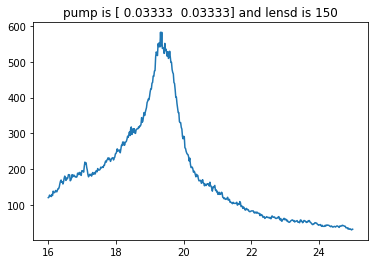

582.0 19.3186372745
[-0.25421289, 0.0019538442, 169.3844]
final coinc are 837
339533
(168814, 2)


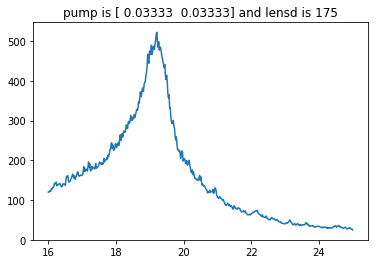

522.0 19.2104208417
[-0.24803433, 2.4518335e-05, 194.17139]
final coinc are 808
338925
(151915, 2)


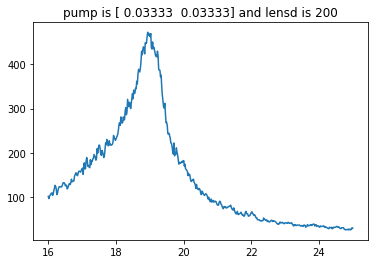

473.0 18.9398797595
[-0.21560888, 0.00028587601, 219.02203]
final coinc are 774
338867
(138455, 2)


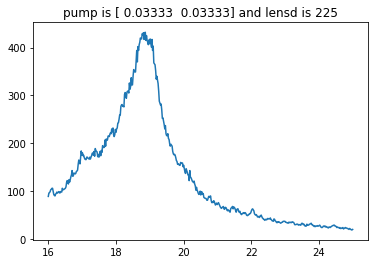

432.0 18.8677354709
[-0.21636795, 0.0025724829, 243.89281]
final coinc are 751
340295
(127788, 2)


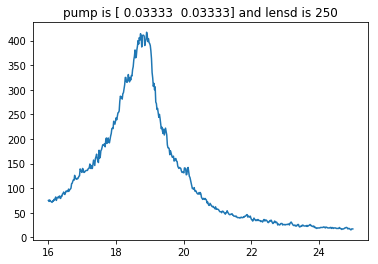

417.0 18.9038076152
[-0.18662874, -0.001349622, 268.80487]
final coinc are 720
340774
(117329, 2)


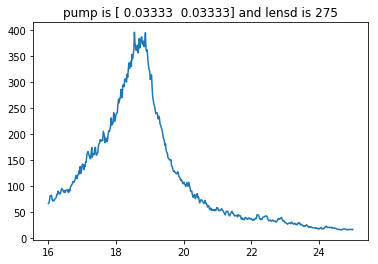

396.0 18.5430861723
[-0.19119895, 0.0020315966, 293.7258]
final coinc are 666
339815
(108299, 2)


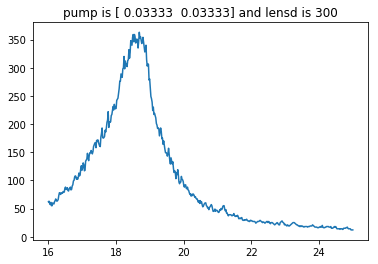

363.0 18.6873747495
[-0.19509968, 0.0048264982, 318.65918]
final coinc are 569
339675
(101437, 2)


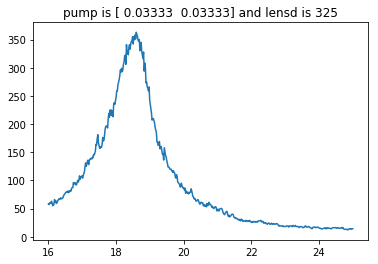

363.0 18.5971943888
[-0.18757953, -0.00058642897, 343.60559]
final coinc are 578
340404
(94527, 2)


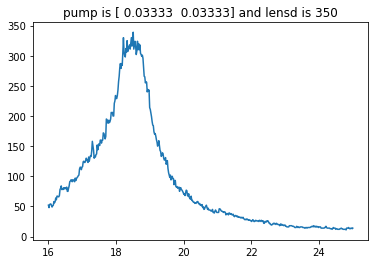

339.0 18.5070140281
[-0.19663957, 0.00028145709, 368.55667]
final coinc are 517
340135
(88564, 2)


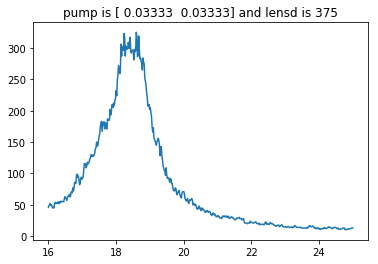

325.0 18.5971943888
[-0.17296623, -0.0025583429, 393.51633]
final coinc are 517
[ 0.025  0.025]
339031
(277610, 2)


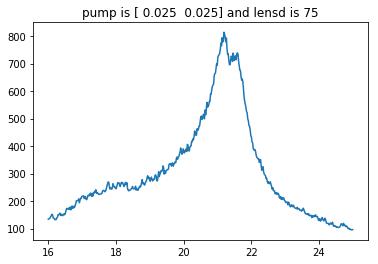

814.0 21.1943887776
[-0.25072742, -0.0012478146, 96.216278]
final coinc are 1189
338926
(239467, 2)


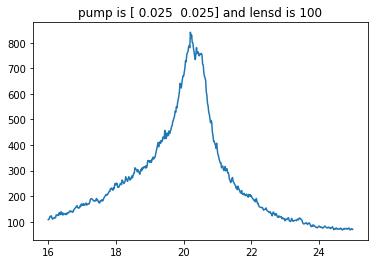

841.0 20.2024048096
[-0.24261107, 0.00069362571, 120.25256]
final coinc are 1307
339385
(208979, 2)


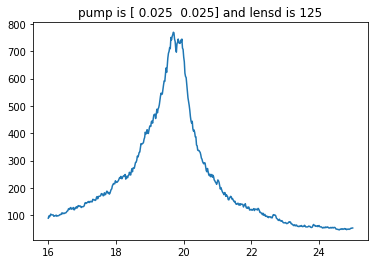

770.0 19.6973947896
[-0.22753531, 0.0015390033, 144.74361]
final coinc are 1301
339464
(184157, 2)


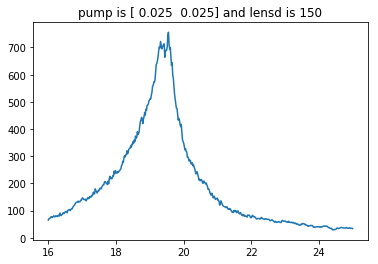

756.0 19.5531062124
[-0.1520092, -0.0016775455, 169.46875]
final coinc are 1147
339210
(162817, 2)


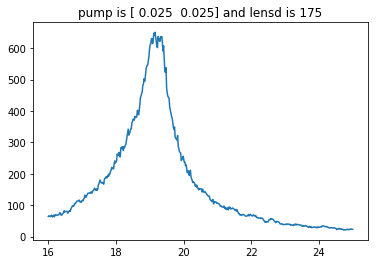

651.0 19.1563126253
[-0.22430046, -0.00017724159, 194.18349]
final coinc are 1207
338259
(145614, 2)


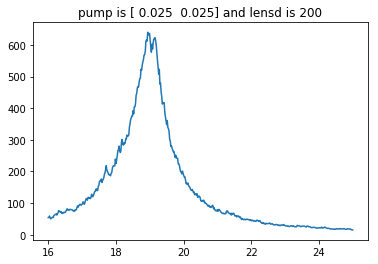

640.0 18.9398797595
[-0.22104892, 0.000131715, 219.02216]
final coinc are 1118
338610
(131620, 2)


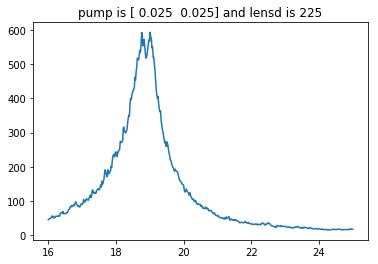

594.0 19.0120240481
[-0.15124418, 0.0019932957, 243.92456]
final coinc are 928
338462
(119596, 2)


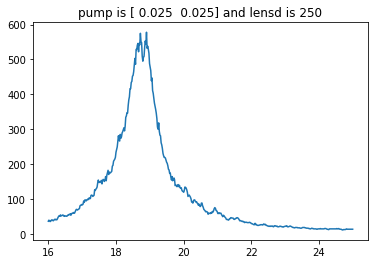

578.0 18.9038076152
[-0.14566007, 0.001368058, 268.82822]
final coinc are 871
338375
(109294, 2)


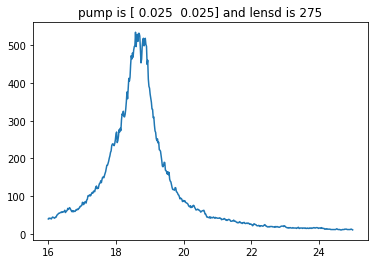

534.0 18.5791583166
[-0.22111212, -0.00070447876, 293.71475]
final coinc are 866
338690
(100822, 2)


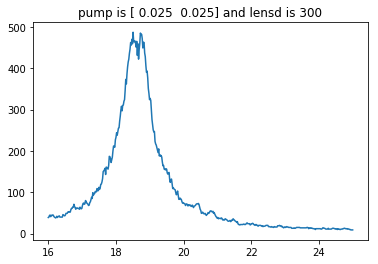

487.0 18.5070140281
[-0.21358731, -0.00090873061, 318.6525]
final coinc are 721
338733
(93684, 2)


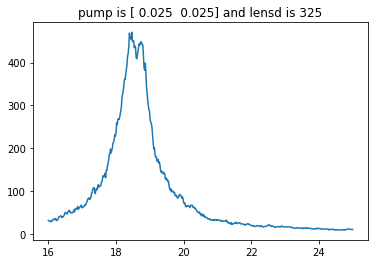

471.0 18.4709418838
[-0.2108366, -0.0018121498, 343.59329]
final coinc are 703
337888
(87095, 2)


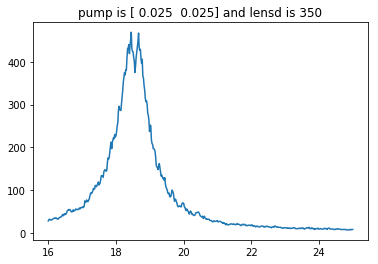

469.0 18.4529058116
[-0.21764719, 0.00096543651, 368.54785]
final coinc are 704
338973
(81500, 2)


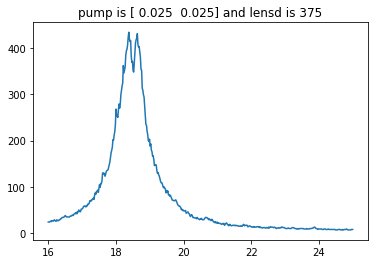

434.0 18.380761523
[-0.20701371, 6.0863225e-05, 393.51233]
final coinc are 634
doing iteration 3
[ 0.15  0.15]
330960
(269844, 2)


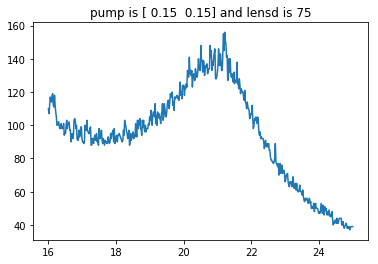

156.0 21.2124248497
[-0.23639846, 0.021301635, 96.205788]
final coinc are 72
331343
(232458, 2)


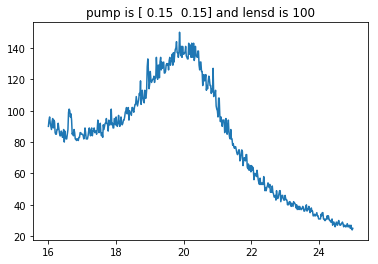

150.0 19.877755511
[-0.24013792, 0.0076445388, 120.20729]
final coinc are 71
331915
(204051, 2)


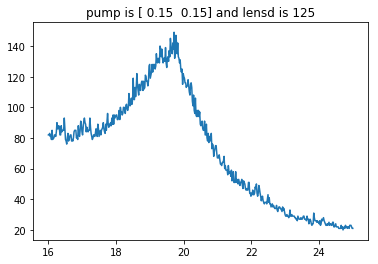

149.0 19.7154308617
[-0.2381794, -0.012998549, 144.71094]
final coinc are 91
330328
(179437, 2)


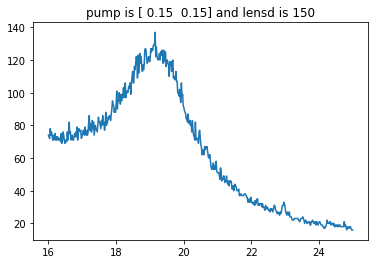

137.0 19.1563126253


KeyboardInterrupt: 

In [5]:
Optimize = True
pumpcurvl = [True,True,True,True,True]
walkoffl = [True,True,True,True,True]
############################Horizontal SHRINKING####################################################
# pump_M2_list=np.array([[1.0,1.0],[1.0,1.0],[1.0,1],[1.0,1.0],[1.0,1.0]])*1
# pumps = [[0.1,0.15],[0.1,0.1],[0.1,0.05],[0.1,0.03333],[0.1,0.025]]
# pump_focus_list=[[2.5,2.5],[2.5,2.5],[2.5,2.5],[2.5,2.5],[2.5,2.5]]

# ############################VERTICAL SHRINKING#######################################################
pump_M2_list=np.array([[1.0,1.0],[1.0,1.0],[1.0,1],[1.0,1.0],[1.0,1.0]])*1
pumps = [[0.15,0.15],[0.1,0.1],[0.05,0.05],[0.03333,0.03333],[0.025,0.025]]
pump_focus_list=[[2.5,2.5],[2.5,2.5],[2.5,2.5],[2.5,2.5],[2.5,2.5]]
# ############################WISHFULL THINKING#####################################################
# pump_M2_list=np.array([[1.0577,1.1076],[1.4723,1.0191],[1.6733,1]])*1
# pumps = [[0.098334,0.096517*0.4],[0.096551,0.052454*0.4],[0.081456,0.025478*0.25]]
# pump_focus_list=[[2.5+11.9,2.5],[2.5-8,2.5],[2.5-22.8,2.5]]
# #                     [[-3,-3],[3,3],[22.5,0]]
# ###################################################################################################

lensd_photons_1=[[[] for x in range(len([3,4,5,6,7,8,9,10,11,12,13,14,15]))]for y in pumps]
lensd_fibre_1=[[[] for x in range(len([3,4,5,6,7,8,9,10,11,12,13,14,15]))]for y in pumps]

for k in range(5):
    pumpcurv=pumpcurvl[k]
    walkoff=walkoffl[k]
    for i,pump in enumerate(pumps):
        pump=np.array(pump)
        print(pump)
        pump_focus=np.array(pump_focus_list[i])
        pump_M2 = pump_M2_list[i]
#     for i,pump in enumerate([[0.5,0.5]]):
        for j,holes in enumerate([3,4,5,6,7,8,9,10,11,12,13,14,15]):
#         for j,holes in enumerate([4,5]):
            Crystal1=Crystal(name = 'BBO1',material = 'BBO',position = [0,0,2.5],thickness = 5,orientation="up",cutangle=28.76*np.pi/180)
            lenspos=25*holes
    #         print(lenspos)
            ACH=Lens.achromat_aitor_r(position = [0,0,lenspos],centre=[-0.18,0,0],f=250)
            Csetup=ExpSetup(Crystal1,ACH)
            sim2=Simulation(rays=[0],setup=Csetup)
            sim2.run(Ntot=90000000,nr_crystals=1,gen_SPDC = True,pumpray=Ray(position=[0,0,0],angles=[0,0],wavelength=405,polarization="H"),pump_waist=pump,pump_focus=pump_focus,pump_M2=pump_M2,walkoff=walkoff,pumpcurv=pumpcurv)
            print(len(sim2.complete_results[0][0]))
            vis2=Visualization(simulation=sim2)
#             plt.figure()
#             plt.hist(90/np.pi*((vis2.simulation.start_list[0][1]).T[0]+(vis2.simulation.start_list[1][1]).T[0]),alpha=0.5)
#             plt.hist(90/np.pi*((vis2.simulation.start_list[0][1]).T[1]+(vis2.simulation.start_list[1][1]).T[1]),alpha=0.5)
#             plt.show()
    #         vis2.showpos_single(pos=5.001)
    #         vis2.SPDC_list=SPDC_list
            Hit_Lens_True=((vis2.complete_results[0][0][...,2][...,0:2]-np.array([-0.18,0]))*(vis2.complete_results[0][0][...,2][...,0:2]-np.array([-0.18,0]))).sum(axis=1)<(7.5**2)/4

            send=np.float32(vis2.complete_results[0][0][...,-1][...,0:2])[Hit_Lens_True]
            sbeg=np.float32(vis2.complete_results[0][0][...,-2][...,0:2])[Hit_Lens_True]

            iend=np.float32(vis2.complete_results[1][0][...,-1][...,0:2])[Hit_Lens_True]
            ibeg=np.float32(vis2.complete_results[1][0][...,-2][...,0:2])[Hit_Lens_True]

            z_beg_val=np.float32(vis2.complete_results[0][0][...,-2][0][...,2])
            z_end_val=np.float32(vis2.complete_results[0][0][...,-1][0][...,2])

            print(send.shape)

            [sbeg,send,ibeg,iend]=Visualization.select_NA_TRUE(sbeg,send,ibeg,iend,z_beg_val,z_end_val,core_diam=fibre_diam,Num_Ap = fibre_NA)

            plt.plot(np.linspace(16,25,500),[focus_setup(x,sbeg,send,ibeg,iend,z_beg_val,z_end_val,offset=lenspos) for x in np.linspace(16,25,500)])
            plt.title("pump is {} and lensd is {}".format(pump,lenspos))
            plt.show()

#             [(vis2.showpos_single(pos = x+lenspos),print(focus_setup(x+lenspos,sbeg,send,ibeg,iend,z_beg_val,z_end_val))) for x in np.linspace(15,21,25)]

    #         print(np.min([vis2.showpos_single(pos=x+lenspos) for x in np.linspace(0,100,100)]))
            if Optimize:
                scanlist=[focus_setup(x,sbeg,send,ibeg,iend,z_beg_val,z_end_val,lenspos) for x in np.linspace(16,25,500)]
                result_for_foc=[np.max(scanlist),np.linspace(16,25,500)[np.argmax(scanlist)]]
                print(result_for_foc[0],result_for_foc[1])
                search_pos=[-0.18,0,result_for_foc[1]+lenspos]

                dx=0.05
                dy=0.025
                dz=0.1
                res=np.empty((20,20,200))
                scale=1
                scale_evol=0.75
                coinc_start= 0
                coincs= 0
                been_0=False
                while dz>0.00005 and dz<10 :

#                         print(dx,dy,dz,search_pos)

                        x_range=np.linspace(search_pos[0]-dx,search_pos[0]+dx,20,dtype=np.float32)
                        y_range=np.linspace(search_pos[1]-dy,search_pos[1]+dy,20,dtype=np.float32)
                        z_range=np.linspace(search_pos[2]-dz,search_pos[2]+dz,200,dtype=np.float32)

                        res=d_coinc(sbeg, send ,ibeg,iend,x_range,y_range,(z_range-z_beg_val)/(z_end_val-z_beg_val))
                        coincs=np.max(res)
                        maxindex=np.unravel_index(np.argmax(res),res.shape)


                        if coincs < 2:
                            dx *= 1.
                            dy *= 1.
                            dz *= 1.1
                            search_pos[2]+=0.01
                            been_0 =True
#                             if not coincs == 0: 
#                                 search_pos[2] = z_range[maxindex[2]]
                            dx = max(0.2,dx)
                            dy = max(0.05,dy)


                        else:
                            if been_0:
                                dx=0.1
                                dy=0.02
                                dz=0.1
                                been_0 = False

                            scale *=scale_evol 
                            dx *= scale*(0.66+2*((abs(maxindex[0]-10))/20))
                            dy *= scale*(0.66+2*((abs(maxindex[1]-10))/20))
                            dz *= scale*(0.66+2*((abs(maxindex[2]-100))/200))

    #                         dx *= 2/100
    #                         dy *= 2/60
    #                         dz *= 2/100

                            search_pos = [x_range[maxindex[0]],y_range[maxindex[1]],z_range[maxindex[2]]]
                        diff=abs(coinc_start-coincs)
                        coinc_start=coincs
#                         print("coincidences are",coincs,maxindex)

    #         vis2.showpos_single(pos=search_pos[-1])
            print(search_pos)
            lensd_fibre_1[i][j]=search_pos
            del sim2.start_list
            sim2.interpol_pos = 0
#             print(hasattr(sim2,'start_list'))
            sim2.run(Ntot=480000000,nr_crystals=1,gen_SPDC = True,pumpray=Ray(position=[0,0,0],angles=[0,0],wavelength=405,polarization="H"),pump_waist=pump,pump_focus=pump_focus,pump_M2=pump_M2,walkoff=walkoff,pumpcurv=pumpcurv)
            vis_result=Visualization(simulation=sim2)

    #         vis_result.showpos_single(pos=search_pos[-1])


            lensd_photons_1[i][j]+=get_results_evol(vis_result,search_pos)
    print("doing iteration {}".format(k+1))



            
        



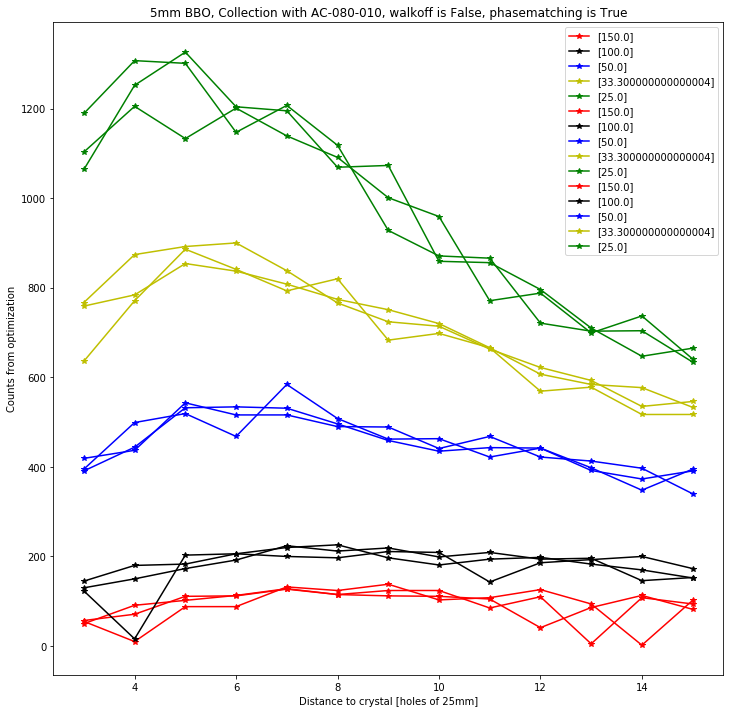

In [11]:
kk=0
pump_M2_list=np.array([[1.0,1.0],[1.0,1.0],[1.0,1],[1.0,1.0],[1.0,1.0]])*1
pumps = [[0.15,0.1],[0.1,0.1],[0.05,0.1],[0.03333,0.1],[0.025,0.1]]
pump_focus_list=[[2.5,2.5],[2.5,2.5],[2.5,2.5],[2.5,2.5],[2.5,2.5]]


xpos=[3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.figure(figsize=[12,12])
for kk in [0,1,2]:
    for y in [0,1,2,3,4]:
        c = ['r*-','k*-','b*-','y*-','g*-','y.','b.','g-.','r-.'][y]
        label = [1000*round(pumps[y][0],4)]
        plt.plot(xpos,[(lensd_photons_1[y][i][kk*4]) for i,x in enumerate(xpos)],c,label=label)
plt.title("5mm BBO, Collection with AC-080-010, walkoff is {}, phasematching is {}".format([True,True,False,False][kk],[True,False,True,False][kk]))
plt.xlabel("Distance to crystal [holes of 25mm]")
plt.ylabel("Counts from optimization")
plt.legend()
plt.show()

In [31]:
rawdata=[[],[],[],[],[],[]]
xpos=[3,4,5,6,7,8,9,10,11,12,13,14,15]
pump_M2_list=np.array([[1.0,1.0],[1.0,1.0],[1.0,1],[1.0,1.0],[1.0,1.0]])*1
pumps = [[0.15,0.1],[0.1,0.1],[0.05,0.1],[0.03333,0.1],[0.025,0.1]]
pump_focus_list=[[2.5,2.5],[2.5,2.5],[2.5,2.5],[2.5,2.5],[2.5,2.5]]

for y in [0,1,2,3,4]:

    rawdata[y+1]=[max([(lensd_photons_1[y][i][kk*4]) for kk in range(3)]) for i,x in enumerate(xpos)]
    
rawdata[0]=xpos
np.savez("C:/Users/ArianStolk/Documents/22012017_horizontal_ellipse_final",rawdata,pumps,pump_focus_list,pump_M2_list)

In [22]:
imported=np.load("C:/Users/ArianStolk/Documents/22122017_vertical_ellipse.npz")

imported['arr_2']

array([[ 14.4,   2.5],
       [ -5.5,   2.5],
       [-20.3,   2.5],
       [-45.5,   2.5]])

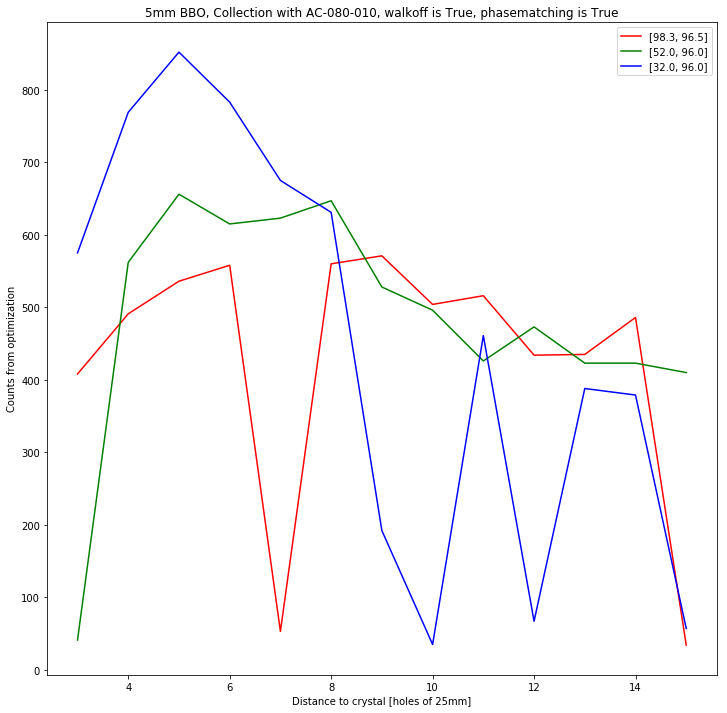

In [24]:
xpos=[3,4,5,6,7,8,9,10,11,12,13,14,15]
pumps = [[0.098334,0.096517],[0.052,0.096],[0.032,0.096]]
kk=0

plt.figure(figsize=[12,12])
for y in [0,1,2]:
    c = ['r-','g-','b-','y-','k-','y-.','b-.','g-.','r-.'][y]
    label = [1000*round(pumps[y][0],4),1000*round(pumps[y][1],4)]
    plt.plot(xpos,[(lensd_photons_2[y][i][kk*4]) for i,x in enumerate(xpos)],c,label=label)
plt.title("5mm BBO, Collection with AC-080-010, walkoff is {}, phasematching is {}".format([True,True,False,False][kk],[True,False,True,False][kk]))
plt.xlabel("Distance to crystal [holes of 25mm]")
plt.ylabel("Counts from optimization")
plt.legend()
plt.show()

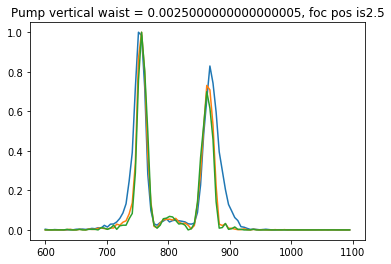

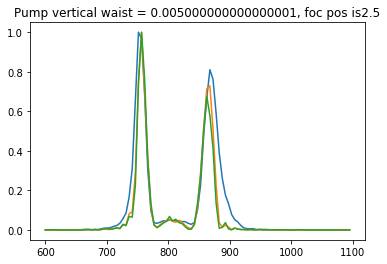

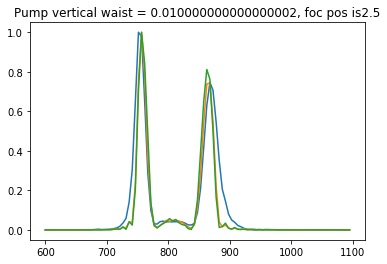

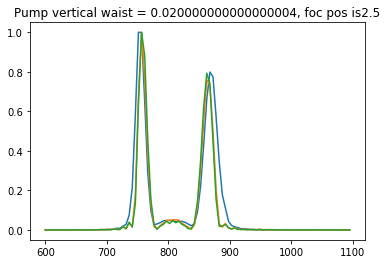

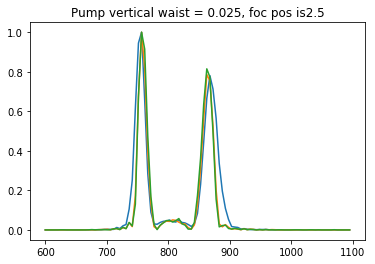

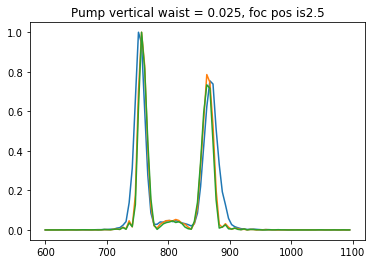

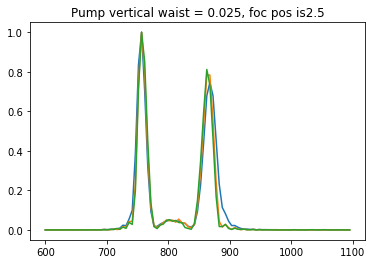

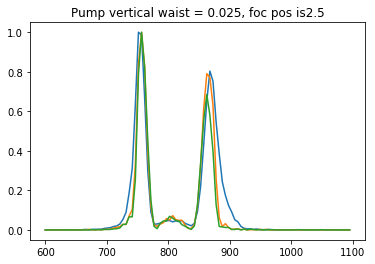

In [51]:
kk=12
for y in range(8):
    plt.figure()
    [plt.plot(lensd_photons_ast[y][x][3+kk][1][0:-1],lensd_photons_ast[y][x][3+kk][0]/max(lensd_photons_ast[y][x][3+kk][0])) for x in [0,5,-1]]
    plt.title("Pump vertical waist = {}, foc pos is{}".format(pumps[y][0],pump_focus_list[y][0]))
    plt.show()

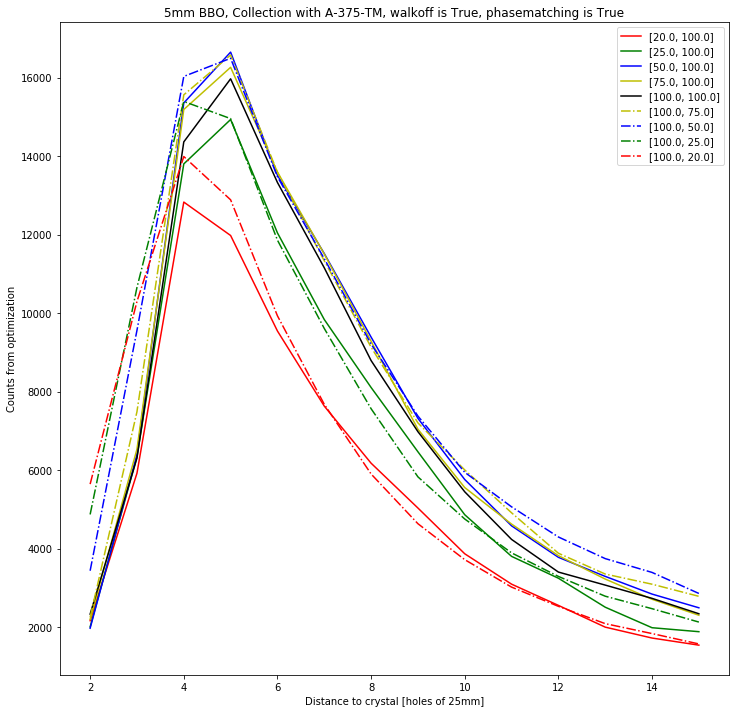

In [16]:
xpos=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
kk=0

plt.figure(figsize=[12,12])
for y in [0,1,2,3,4,5,6,7,8]:
    c = ['r-','g-','b-','y-','k-','y-.','b-.','g-.','r-.'][y]
    label = [1000*round(pumps[y][0],4),1000*round(pumps[y][1],4)]
    plt.plot(xpos,[(lensd_photons_asph[y][i][kk*4]) for i,x in enumerate(xpos)],c,label=label)
plt.title("5mm BBO, Collection with A-375-TM, walkoff is {}, phasematching is {}".format([True,True,False,False][kk],[True,False,True,False][kk]))
plt.xlabel("Distance to crystal [holes of 25mm]")
plt.ylabel("Counts from optimization")
plt.legend()
plt.show()

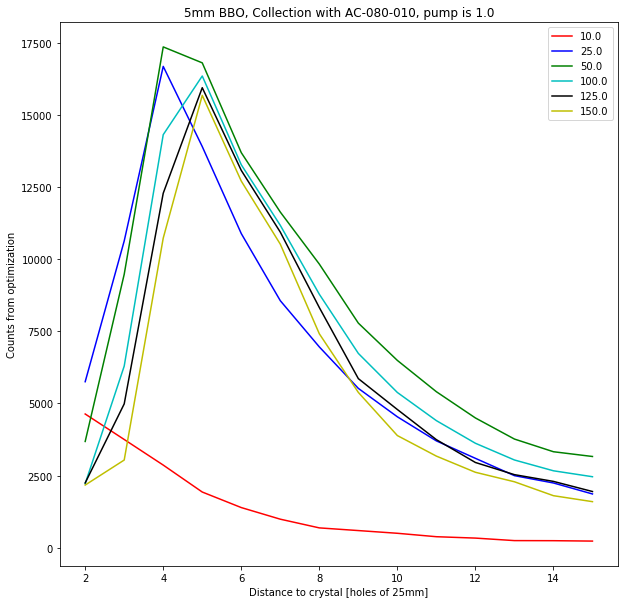

In [8]:
xpos=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
kk=0

plt.figure(figsize=[10,10])
for y in [0,1,2,3,4,5]:
    c = ['r-','b-','g-','c-','k-','y-','m-'][y]
    label = 1000*round(pumps_circ[y][1],3)
    plt.plot(xpos,[(lensd_photons_circ_asph[y][i][kk]) for i,x in enumerate(xpos)],c,label=label)
plt.title("5mm BBO, Collection with A-375-TMB, pump is {}".format(pumps_circ[y][1]/pumps_circ[y][0]))
plt.xlabel("Distance to crystal [holes of 25mm]")
plt.ylabel("Counts from optimization")
plt.legend()
plt.show()

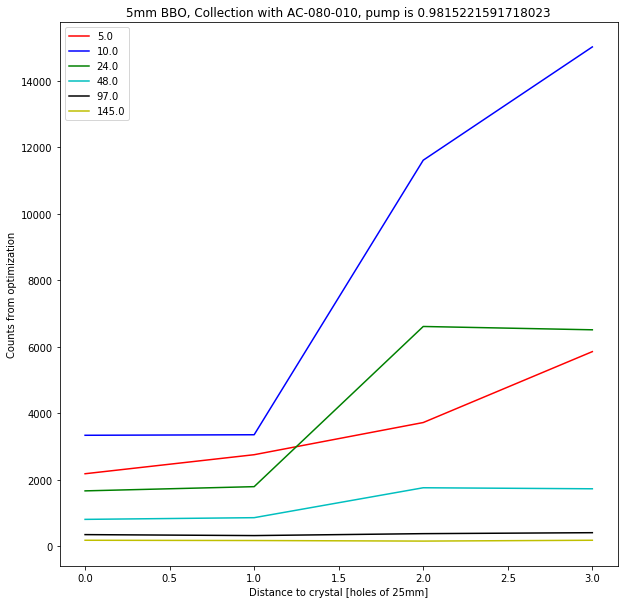

In [42]:
xpos=0
plt.figure(figsize=[10,10]) 
for y in [0,1,2,3,4,5]: 
    c = ['r-','b-','g-','c-','k-','y-','m-'][y] 
    label = 1000*round(pumps[y][1],3)
    plt.plot(range(4),[(lensd_photons[y][xpos][kk*4]) for kk in range(4)],c,label=label) 
    plt.title("5mm BBO, Collection with AC-080-010, pump is {}".format(pumps[y][1]/pumps[y][0])) 
    plt.xlabel("Distance to crystal [holes of 25mm]") 
    plt.ylabel("Counts from optimization") 
plt.legend() 
plt.show()

In [55]:
np.savez("C:/Users/ArianStolk/Documents/ast_sweep_10122017_result_circsym_sweep",lensd_photons)
# np.savez("C:/Users/ArianStolk/Documents/ast_sweep_10122017_coos_circsym_sweep",np.reshape(lensd_fibre,(6,len([4,5,6,7,8,9,10,11,12,13,14,15]),3)))
# np.savez("C:/Users/ArianStolk/Documents/ast_sweep_10122017_pumps_circsym_sweep",np.reshape(pumps,(6,2)))

ValueError: setting an array element with a sequence.

In [60]:
lensd_photons[0][0]

[2175,
 0.5867278122471001,
 0.7430816535702084,
 (array([  3,   3,   0,   0,   2,   2,   1,   0,   3,   4,   4,   4,   5,
          15,   6,  13,  20,  17,  20,  28,  32,  45,  55,  53,  88,  79,
         106, 119, 155, 167, 191, 212, 197, 175, 167, 150, 146, 139, 144,
         129, 136, 142, 132, 120, 128, 150, 123, 140, 148, 154, 160, 162,
         181, 188, 199, 175, 154, 151, 119, 124, 107,  87,  64,  80,  47,
          58,  47,  50,  42,  47,  37,  30,  26,  17,  20,  20,  21,  21,
           9,  19,  11,   6,   8,  11,   7,  10,   2,   4,  10,   3,   2,
           5,   3,   1,   0,   2,   1,   2,   0], dtype=int64),
  array([  600.        ,   605.05050505,   610.1010101 ,   615.15151515,
           620.2020202 ,   625.25252525,   630.3030303 ,   635.35353535,
           640.4040404 ,   645.45454545,   650.50505051,   655.55555556,
           660.60606061,   665.65656566,   670.70707071,   675.75757576,
           680.80808081,   685.85858586,   690.90909091,   695.95959596,
    

get_counts_evol([-0.6,0,151],0.1,0.22)

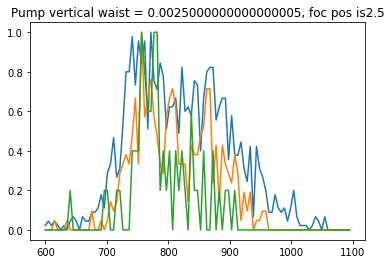

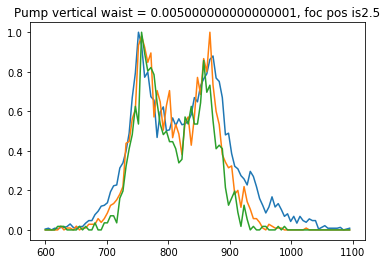

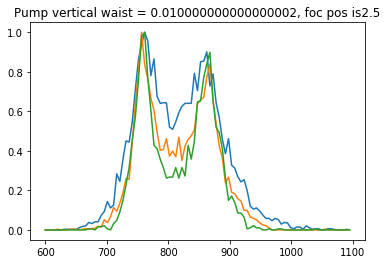

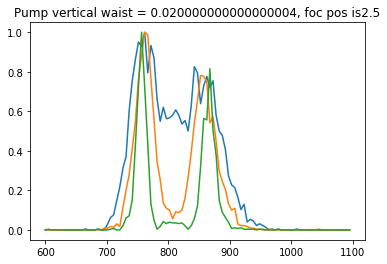

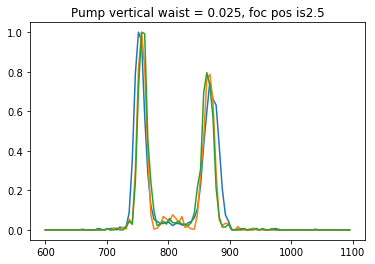

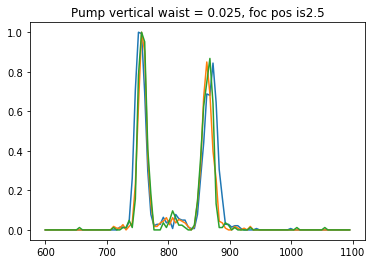

In [42]:
kk=0
for y in range(6):
    plt.figure()
    [plt.plot(lensd_photons[y][x][3+kk][1][0:-1],lensd_photons[y][x][3+kk][0]/max(lensd_photons[y][x][3+kk][0])) for x in [0,5,-1]]
    plt.title("Pump vertical waist = {}, foc pos is{}".format(pumps[y][0],pump_focus_list[y][0]))
    plt.show()

In [43]:
sum([lensd_photons[1][1][3+z][0] for z in [0,4,8]])

array([   0,    0,    0,    0,    1,    1,    0,    0,    0,    0,    1,
          0,    2,    1,    3,    7,    5,    4,    7,   15,   27,   23,
         95,  235,  489,  764,  944, 1121, 1275, 1624, 2091, 1969, 1291,
        701,  274,  105,   87,   88,  114,   90,  114,  109,   94,   91,
        106,   81,   72,   79,  109,  229,  528,  864, 1292, 1559, 1483,
       1230, 1007,  824,  783,  621,  587,  508,  443,  427,  316,  185,
         86,   59,   40,   25,   20,   10,   10,    3,    8,    4,    3,
          1,    2,    1,    4,    3,    2,    0,    4,    1,    0,    0,
          1,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0], dtype=int64)

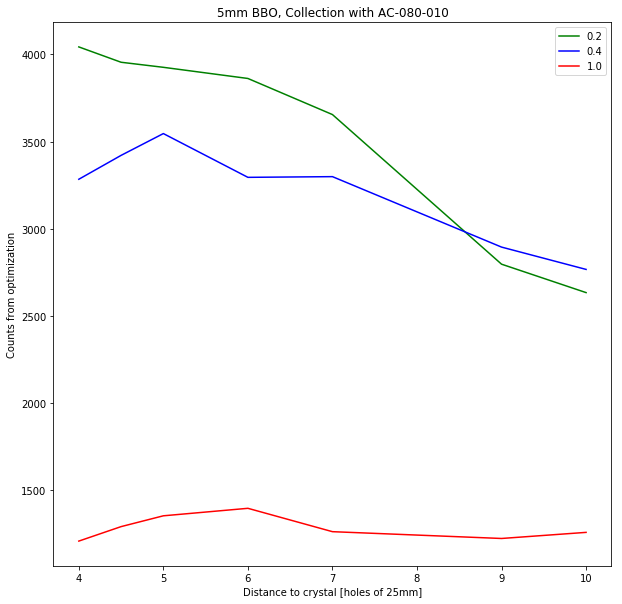

In [43]:
pumps = np.array([[121,28],[119,43],[120,79],[117,117],[78,116],[43,119],[28,121]])/1000
xpos=[4,4.5,5,6,7,9,10]

plt.figure(figsize=[10,10])
for y in [0,1,3]:
    c = ['g-','b-','b-','r-','k-','c-.','b-.','g-.'][y]
    label = [round(pump[1]/pump[0],1) for pump in pumps][y]
    plt.plot(xpos,[result_achromat[0][y][i+4] for i,x in enumerate(xpos)],c,label=label)

plt.title("5mm BBO, Collection with AC-080-010")
plt.xlabel("Distance to crystal [holes of 25mm]")
plt.ylabel("Counts from optimization")
plt.legend()
plt.show()

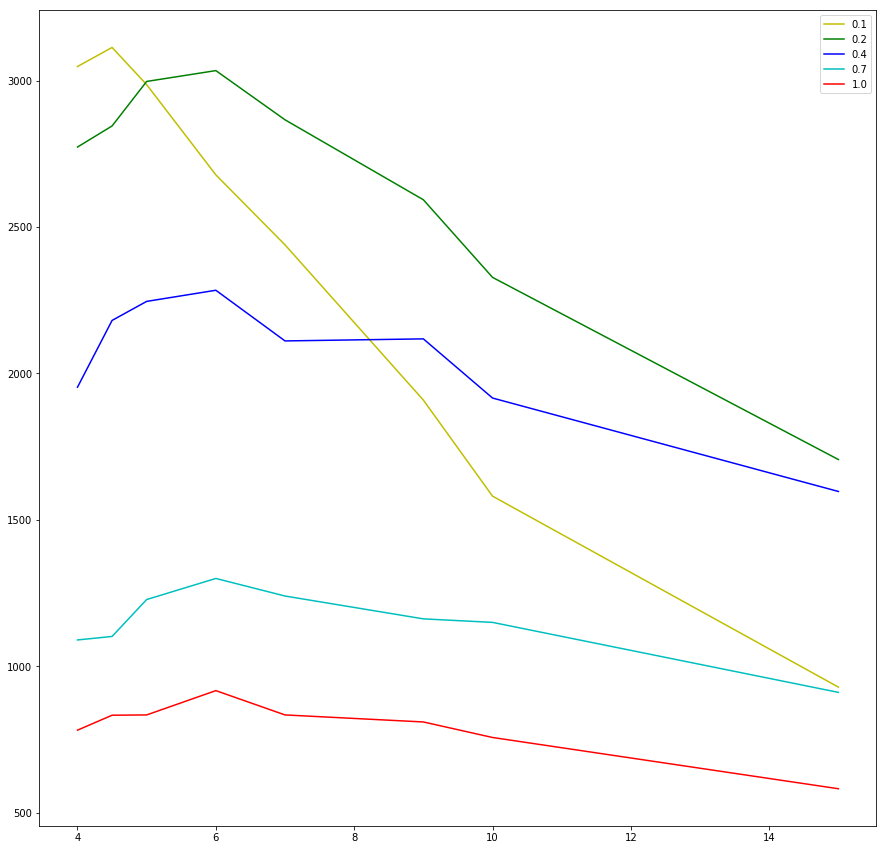

In [30]:
imported_data=np.load("C:/Users/ArianStolk/Documents/ast_sweep_28112017.npz")['arr_0']

plt.figure(figsize=[15,15])
for y in range(5):
    c = ['y-','g-','b-','c-','r-','c-.','b-.','g-.'][y]
    label = [round(pump[1]/pump[0],1) for pump in pumps][y]
    xpos=[4,4.5,5,6,7,9,10,15]
    plt.plot(xpos,[imported_data[0][y][i+4] for i,x in enumerate(xpos)],c,label=label)

plt.legend()
plt.show()

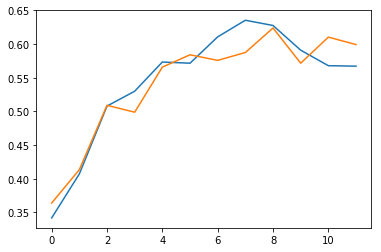

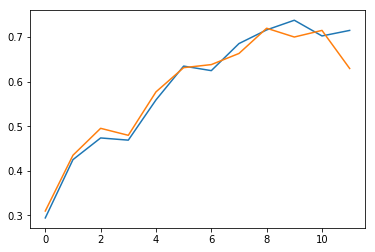

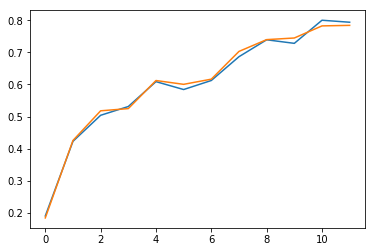

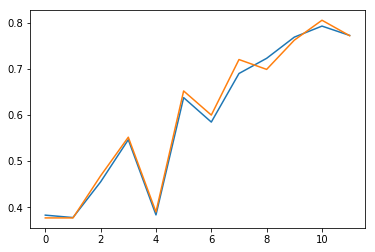

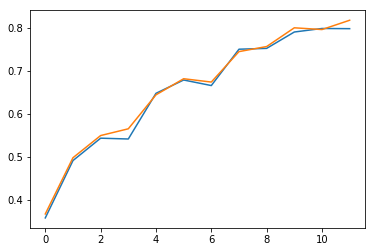

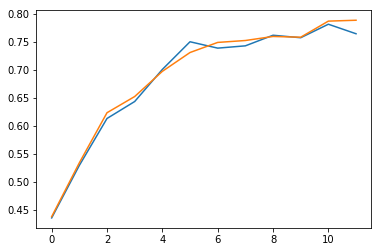

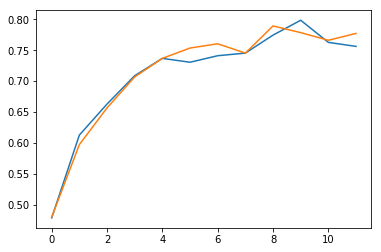

IndexError: list index out of range

In [38]:

for y in range(8):
    plt.figure()
    plt.plot([lensd_photons[y][x][1:3] for x in range(len([2,2.5,3,3.5,4,4.5,5,6,7,9,10,15]))])
    plt.show()


In [118]:
N=10000
M=50

send=np.float32(vis2.complete_results[0][0][...,-1][0:N][...,0:2])
sbeg=np.float32(vis2.complete_results[0][0][...,-2][0:N][...,0:2])

iend=np.float32(vis2.complete_results[1][0][...,-1][0:N][...,0:2])
ibeg=np.float32(vis2.complete_results[1][0][...,-2][0:N][...,0:2])

x,y,z=np.full(M,-0.2,dtype=np.float32),np.full(M,0,dtype=np.float32),np.full(M,61.375+25.,dtype=np.float32)

res=np.empty((M,M,M),dtype=np.float32)

In [119]:

cProfile.run('res=d_coinc(sbeg,send,ibeg,iend,x,y,z)',sort="time")

         3 function calls in 3.869 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    3.869    3.869    3.869    3.869 <string>:1(<module>)
        1    0.000    0.000    3.869    3.869 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




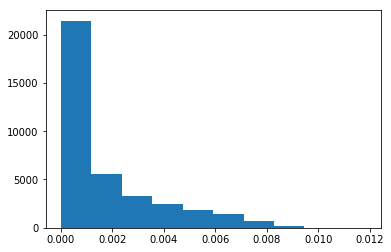

(array([    0,     1,     2, ..., 36958, 36959, 36960], dtype=int64),)

In [59]:
((vis2.complete_results[0][0][...,1][...,0:2]-np.array([-0.16,0]))*(vis2.complete_results[0][0][...,1][...,0:2]-np.array([-0.16,0]))).sum(axis=1)<4*4

array([False, False, False, ..., False,  True,  True], dtype=bool)

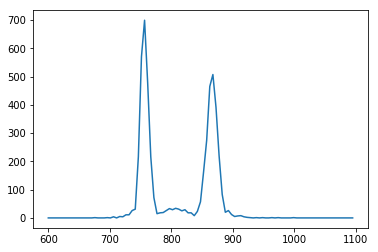

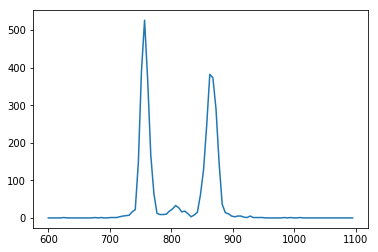

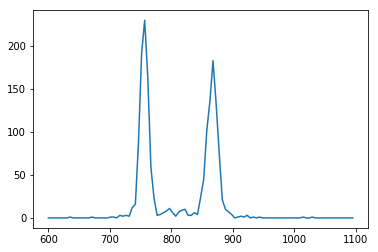

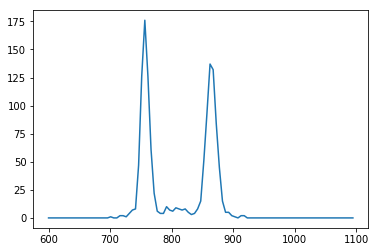

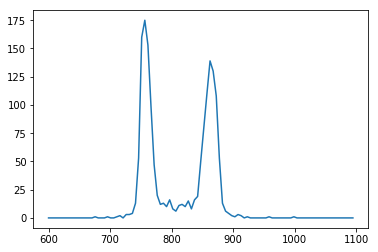

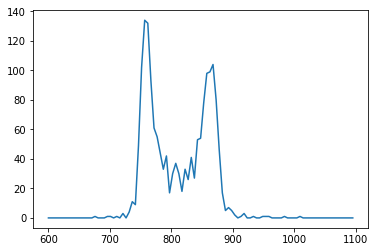

In [48]:
y=0
plt.figure()
[plt.plot(lensd_photons[y][x][3][1][0:-1],lensd_photons[y][x][3][0]) for x in [0]]
plt.show()
y=1
plt.figure()
[plt.plot(lensd_photons[y][x][3][1][0:-1],lensd_photons[y][x][3][0]) for x in [0]]
plt.show()
y=2
plt.figure()
[plt.plot(lensd_photons[y][x][3][1][0:-1],lensd_photons[y][x][3][0]) for x in [0]]
plt.show()
y=3
plt.figure()
[plt.plot(lensd_photons[y][x][3][1][0:-1],lensd_photons[y][x][3][0]) for x in [0]]
plt.show()
y=4
plt.figure()
[plt.plot(lensd_photons[y][x][3][1][0:-1],lensd_photons[y][x][3][0]) for x in [0]]
plt.show()
y=5
plt.figure()
[plt.plot(lensd_photons[y][x][3][1][0:-1],lensd_photons[y][x][3][0]) for x in [0]]
plt.show()

In [34]:
[sum([lensd_photons[0][0][x] for x in [0,4,8,12,16]])

13326

In [37]:
[sum([lensd_photons[y][i][z] for z in [0,4,8,12,16]]) for i,x in enumerate(xpos)]

[13326, 14280, 14146, 14548, 14016, 13037, 12333, 11295, 10658, 7439]

In [16]:
vars(cuda.gpus[0])

{'_device': <weakproxy at 0x0000025C5E5C8958 to Device at 0x0000025C5E4E2198>}

In [31]:
cuda.list_devices().current

In [31]:
0.1/(sqrt(2*log(2)))

0.08493218002880192

1


TypeError: list indices must be integers or slices, not tuple

In [46]:
randomnrs= pcl.rand.normal(0.,1/sqrt(2),1000000,dtype=np.float32, device=False)
np.std(randomnrs)

0.70658433

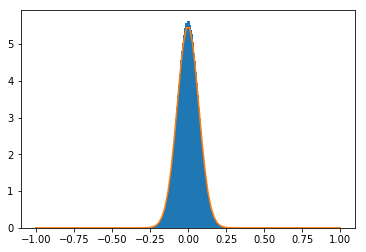

In [47]:
plt.figure()
plt.hist(randomnrs*0.1,100,density=True)
plt.plot(np.linspace(-1,1,100),[exp(-(x**2)/(0.1**2))*5.5 for x in np.linspace(-1,1,100)])
plt.show()

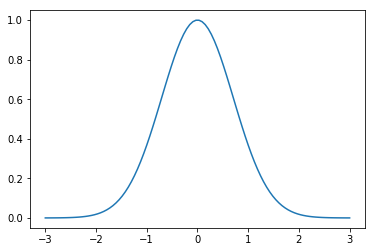

In [34]:
plt.figure()
plt.plot(np.linspace(-3,3,100),[exp(-(x**2)/(1**2)) for x in np.linspace(-3,3,100)])
plt.show()

In [77]:
[[2.5-22.8,2.5]]*5

[[-20.3, 2.5], [-20.3, 2.5], [-20.3, 2.5], [-20.3, 2.5], [-20.3, 2.5]]

In [43]:
import sys


In [44]:
sys.version

'3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]'